In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# read data
data = pd.read_csv(r"C:\\Users\\T480S\\Desktop\\big data\\project\\part A\\house-prices-advanced-regression-techniques\\AmesHousing.csv")
data.head()

# rename columns
data.columns = data.columns.str.replace(' ', '')
data.head()

# summary dataset
print(data.info())
print(data.describe())
print(data.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

# General Information

In [20]:
cat_lst = [var for var in data.columns if data[var].dtype == 'object']
cat_uni = []
cat_nuni = []
cat_count = [] 
for i in cat_lst:
    cat_uni.append({i:data[i].unique()})
    cat_nuni.append({i:data[i].nunique()})
    cat_count.append({i:data[i].value_counts()})
print(cat_uni)
print(cat_nuni)
cat_count

data.drop(["PID","Order","Utilities"],axis = 1)

[{'MSZoning': array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)}, {'Street': array(['Pave', 'Grvl'], dtype=object)}, {'Alley': array([nan, 'Pave', 'Grvl'], dtype=object)}, {'LotShape': array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)}, {'LandContour': array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)}, {'Utilities': array(['AllPub', 'NoSewr', 'NoSeWa'], dtype=object)}, {'LotConfig': array(['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3'], dtype=object)}, {'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object)}, {'Neighborhood': array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)}, {'Condition1': array(['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'R

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RL        141.0    31770   Pave   NaN      IR1   
1             20       RH         80.0    11622   Pave   NaN      Reg   
2             20       RL         81.0    14267   Pave   NaN      IR1   
3             20       RL         93.0    11160   Pave   NaN      Reg   
4             60       RL         74.0    13830   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2925          80       RL         37.0     7937   Pave   NaN      IR1   
2926          20       RL          NaN     8885   Pave   NaN      IR1   
2927          85       RL         62.0    10441   Pave   NaN      Reg   
2928          20       RL         77.0    10010   Pave   NaN      Reg   
2929          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour LotConfig LandSlope  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    Corner       Gtl  ...        0    NaN    NaN         NaN   
1            Lvl    Inside       Gtl  ...        0    NaN  MnPrv         NaN   
2            Lvl    Corner       Gtl  ...        0    NaN    NaN        Gar2   
3            Lvl    Corner       Gtl  ...        0    NaN    NaN         NaN   
4            Lvl    Inside       Gtl  ...        0    NaN  MnPrv         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
2925         Lvl   CulDSac       Gtl  ...        0    NaN  GdPrv         NaN   
2926         Low    Inside       Mod  ...        0    NaN  MnPrv         NaN   
2927         Lvl    Inside       Gtl  ...        0    NaN  MnPrv        Shed   
2928         Lvl    Inside       Mod  ...        0    NaN    NaN         NaN   
2929         Lvl    Inside       Mod  ...        0    NaN    NaN         NaN   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0          0       5    2010       WD          Normal    215000  
1          0       6    2010       WD          Normal    105000  
2      12500       6    2010       WD          Normal    172000  
3          0       4    2010       WD          Normal    244000  
4          0       3    2010       WD          Normal    189900  
...      ...     ...     ...       ...            ...       ...  
2925       0       3    2006       WD          Normal    142500  
2926       0       6    2006       WD          Normal    131000  
2927     700       7    2006       WD          Normal    132000  
2928       0       4    2006       WD          Normal    170000  
2929       0      11    2006       WD          Normal    188000  

[2930 rows x 79 columns]

# Nan value processing

the number of columns with Nan Value is 27


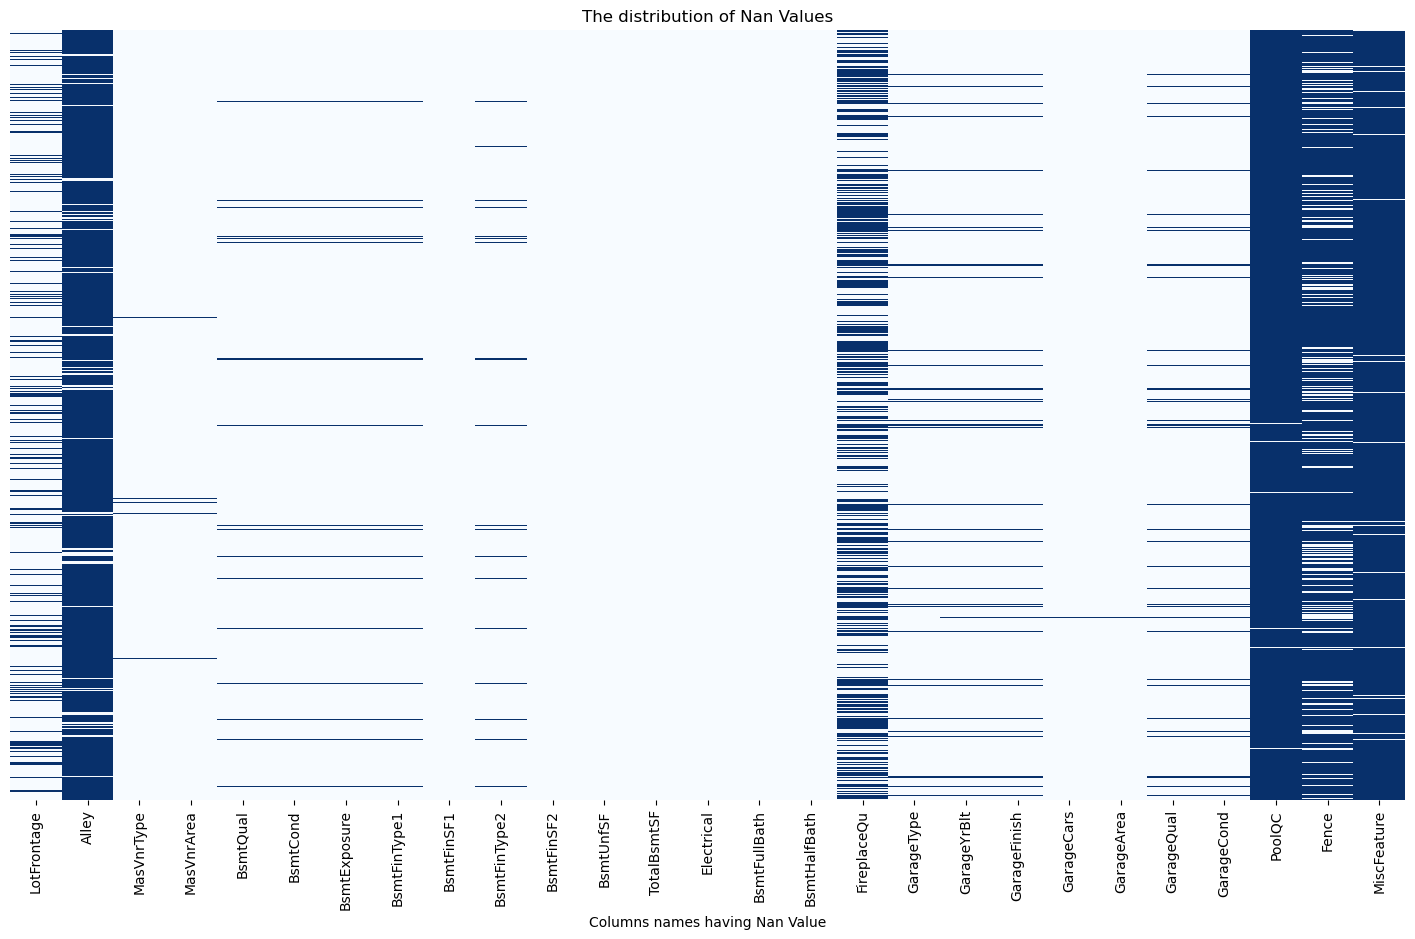

number of categorical variables with missing values: 16
number of numerical variables with missing values: 11
Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')


In [21]:
cols_with_nan = data.columns[data.isnull().any()]
cols_with_nan
print("the number of columns with Nan Value is "f'{len(cols_with_nan)}')

fig,ax = plt.subplots(1,1,figsize=(18,10))
h1 = sns.heatmap(data[cols_with_nan].isnull(), yticklabels=False, cbar=False, cmap='Blues', ax=ax)
h1.set_title("The distribution of Nan Values")
h1.set_xlabel("Columns names having Nan Value")

# 展示图形
plt.show()

df_missing = data[cols_with_nan]
missing_cat = df_missing.loc[:, df_missing.dtypes == "object"].columns
missing_num = df_missing.loc[:, df_missing.dtypes != "object"].columns

print(f"number of categorical variables with missing values: {len(missing_cat)}")
print(f"number of numerical variables with missing values: {len(missing_num)}")
print(missing_cat)
print(missing_num)


In [22]:
# Fill with None for categorical variables
data[missing_cat] = data[missing_cat].fillna("None") 
    
# Fill with 0 for numerical variables
data[missing_num] = data[missing_num].fillna(0)

# cols_with_nan = data.columns[data.isnull().any()]
# print("the number of columns with Nan Value is "f'{len(cols_with_nan)}')

# Target Variable Analysis

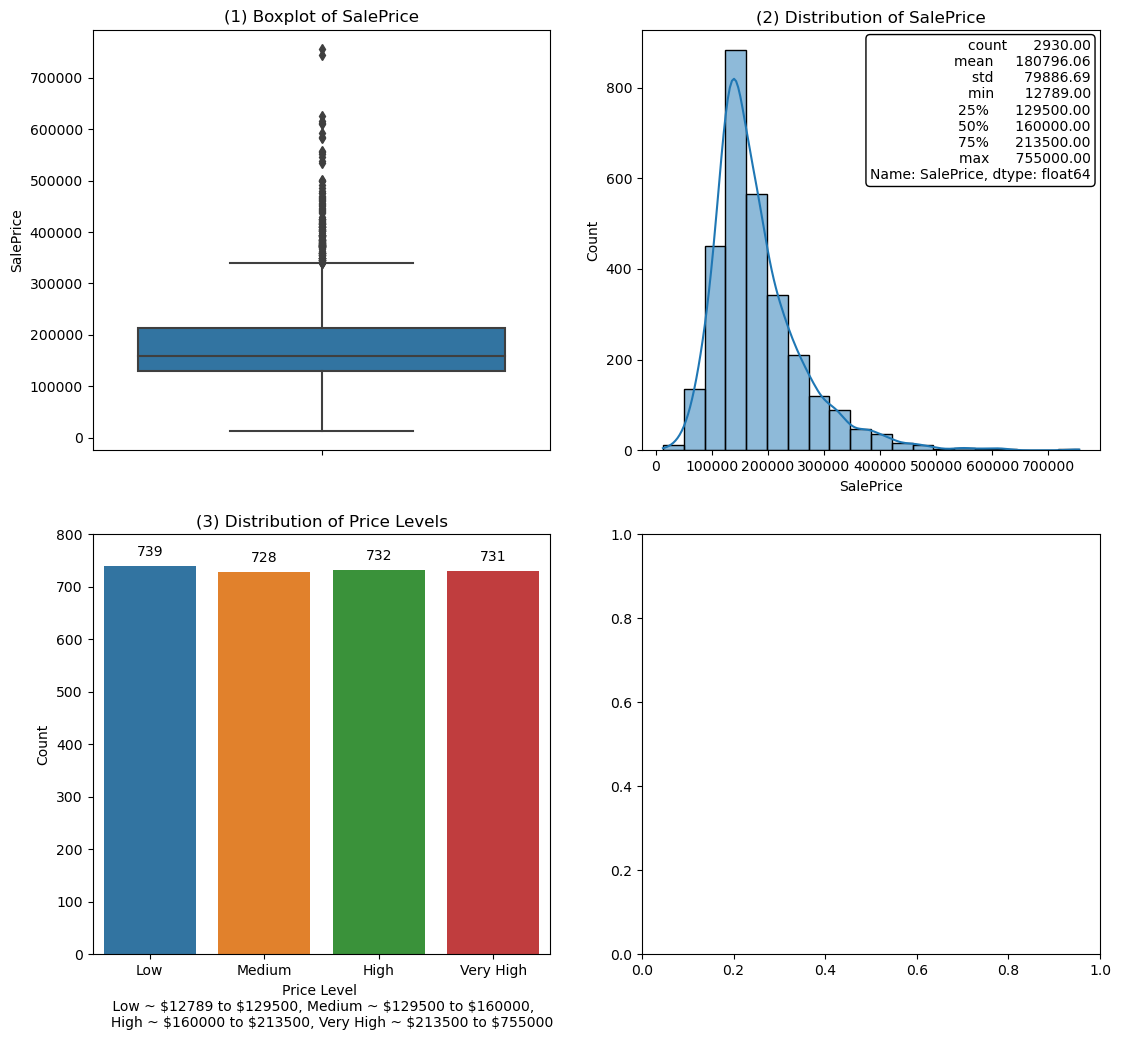

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 12))
ax1 = sns.boxplot(data = data, y = 'SalePrice', whis = 1.5,ax=axes[0,0])
ax1.set_title('(1) Boxplot of SalePrice')

des=round(data["SalePrice"].describe(),2)
ax2 = sns.histplot(data, x='SalePrice', bins=20, kde=True,ax=axes[0,1])
ax2.text(0.98, 0.98, f'{des}', transform=ax2.transAxes,
                ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
ax2.set_title('(2) Distribution of SalePrice')

data["Pricelevel"] = data["SalePrice"].copy()
# Split-box function

# data["PriceLevel"], bins = pd.qcut(data["SalePrice"], bins=4,\
#     labels=["Low", "Medium", "High", "Very High"], \
#     right=False, include_lowest=True, retbins=True, precision=2)

data["PriceLevel"], bins = pd.qcut(data["SalePrice"], q=4, \
    labels=["Low", "Medium", "High", "Very High"], \
    retbins=True, precision=2)

# 绘制柱状图
ax3 = sns.countplot(x="PriceLevel", data=data,ax=axes[1,0])

# 在每个柱形上标注计数值
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')
ax3.set_ylim(0,800)

ax3.set_title('(3) Distribution of Price Levels')
ax3.set_xlabel('Price Level \n Low ~ \$12789 to $129500, Medium ~ $129500 to $160000,\n \
    High ~ \$160000 to $213500, Very High ~ $213500 to $755000')
ax3.set_ylabel('Count')

plt.show()


# Feature Analysis
## Feature of housing structure and layout

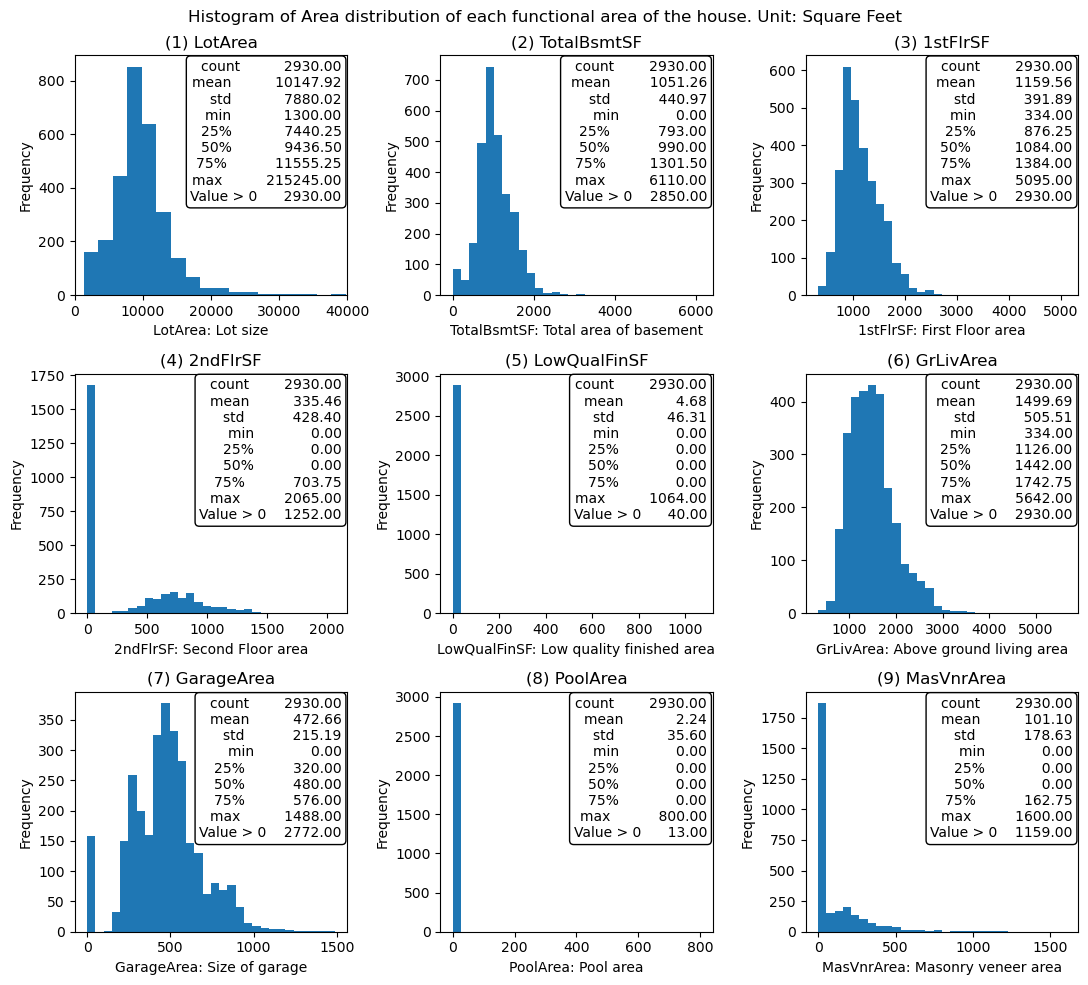

In [7]:
# Area feature
lst_s2 = ["LotArea","TotalBsmtSF","1stFlrSF",\
    "2ndFlrSF","LowQualFinSF","GrLivArea",\
    "GarageArea","PoolArea","MasVnrArea"]
data_s2 = pd.concat((data.loc[:,lst_s2],data.loc[:,"SalePrice"]),axis=1)
data_s2
title_LotArea ='''LotArea: Lot size'''
title_TotalBsmtSF ='''TotalBsmtSF: Total area of basement'''
title_1stFlrSF ='''1stFlrSF: First Floor area'''
title_2ndFlrSF ='''2ndFlrSF: Second Floor area'''
title_LowQualFinSF='''LowQualFinSF: Low quality finished area'''
title_GrLivArea ='''GrLivArea: Above ground living area'''
title_GarageArea ='''GarageArea: Size of garage'''
title_PoolArea = '''PoolArea: Pool area'''
title_MasVnrArea ='''MasVnrArea: Masonry veneer area'''
title_s2 = [title_LotArea,title_TotalBsmtSF,title_1stFlrSF,title_2ndFlrSF,\
title_LowQualFinSF,title_GrLivArea,title_GarageArea,title_PoolArea,title_MasVnrArea]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 10))
#Distribution of some numeric/continuous variables.
fig.suptitle('Histogram of Area distribution of each functional area of the house. Unit: Square Feet')

def custom_description(column):
    description = column.describe()
    description['Value > 0'] = (column > 0).sum()
    description = round(description,2)
    return description
# custom_description
# custom_description(des_s2.iloc[:,0])

for i, column in enumerate(data_s2[lst_s2]):
    
    ax = axes[i // 3, i % 3]  # obtain subplot index

    if ax == axes[0,0]:
        ax.set_xlim(0,40000)
        ax.hist(data_s2[column], bins=100)
    else: 
        ax.hist(data_s2[column], bins=30)  
    ax.set_title(f"({i + 1}) " + lst_s2[i])
    ax.set_xlabel(title_s2[i])
    ax.set_ylabel('Frequency')
    ax.text(0.98, 0.98, f'{custom_description(data_s2.iloc[:,i]).to_string(header=False)}',\
        transform=ax.transAxes,ha='right', va='top',\
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.tight_layout()
plt.show()


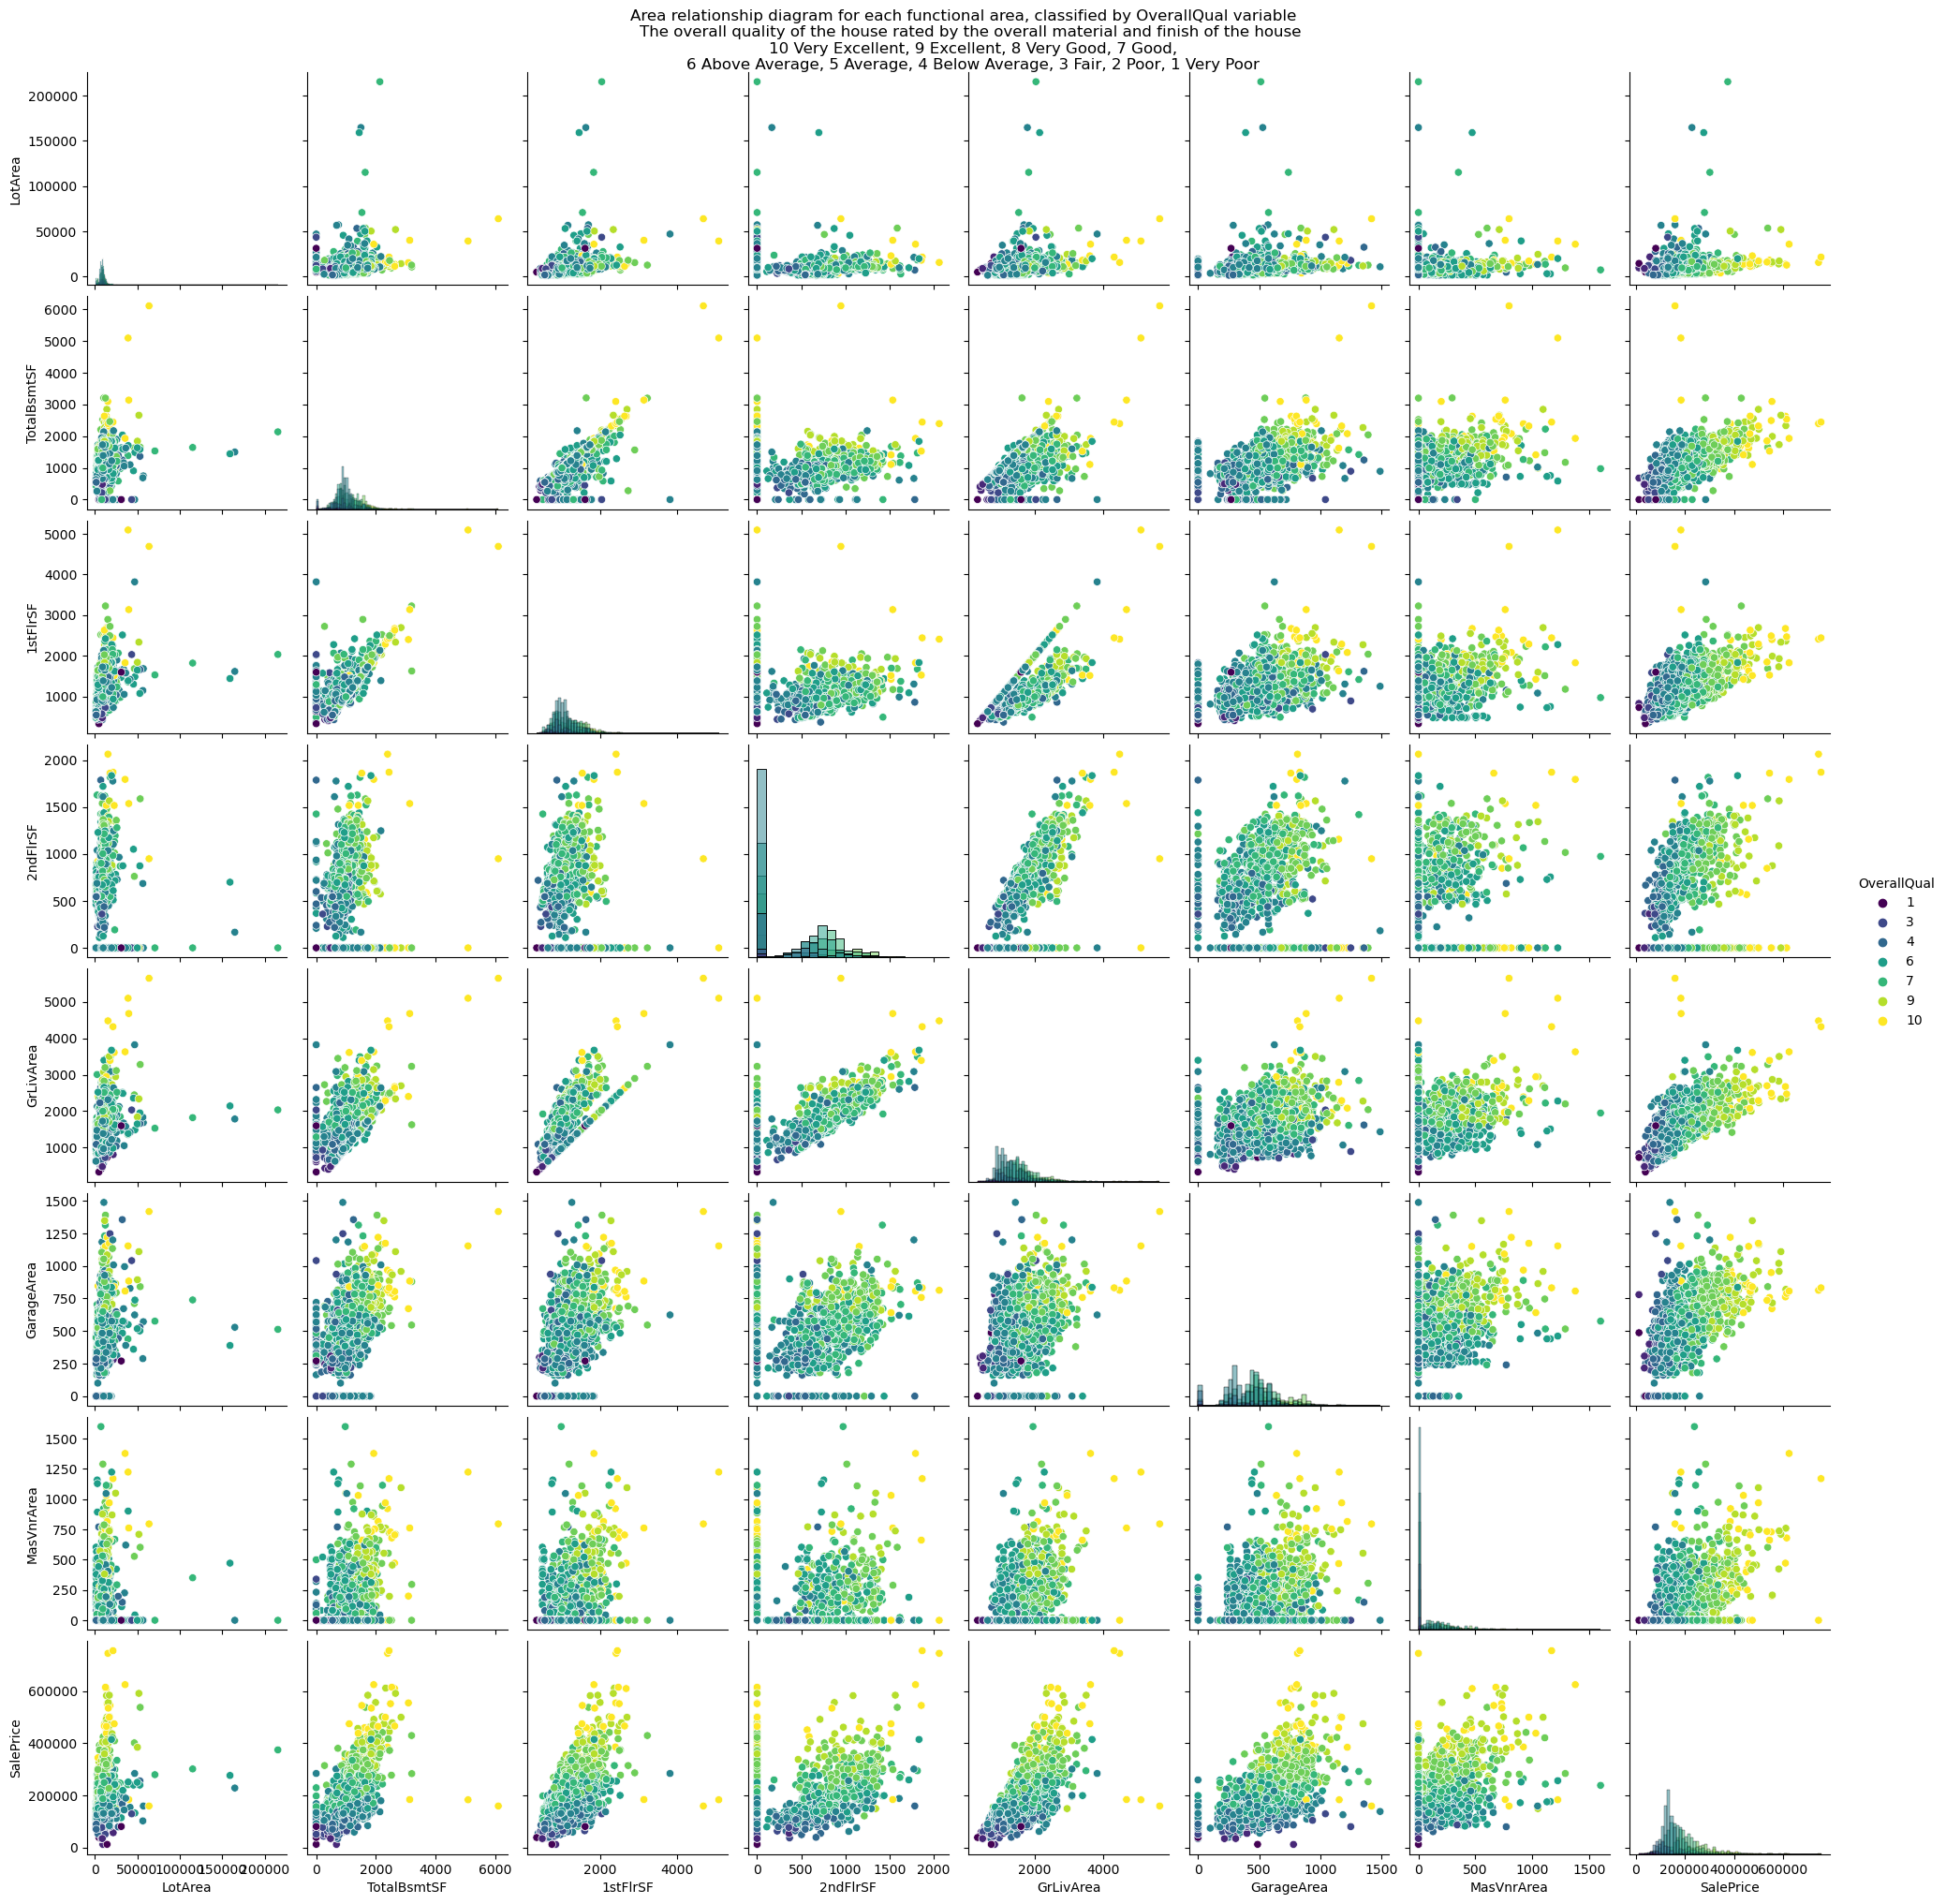

In [12]:
#fig,axes = fig

ax = sns.pairplot(pd.concat((data_s2.drop(["PoolArea","LowQualFinSF"],axis = 1),data.loc[:,'OverallQual']),axis = 1), hue='OverallQual',
            diag_kind='hist', palette='viridis')
xlabel_text = 'OverallQual means the overall quality of the house \n The overall quality of the house rated by the overall material and finish of the house \n\
    10 Very Excellent, 9 Excellent, 8 Very Good, 7 Good,\n 6 Above Average, 5 Average, 4 Below Average, 3 Fair, 2 Poor, 1 Very Poor'
#title_fontdict = {'fontsize': 10, 'fontweight': 'bold'}
ax.fig.suptitle("Area relationship diagram for each functional area, classified by OverallQual variable\n\
    The overall quality of the house rated by the overall material and finish of the house \n\
    10 Very Excellent, 9 Excellent, 8 Very Good, 7 Good,\n\
    6 Above Average, 5 Average, 4 Below Average, 3 Fair, 2 Poor, 1 Very Poor", y=1.02)

plt.show()

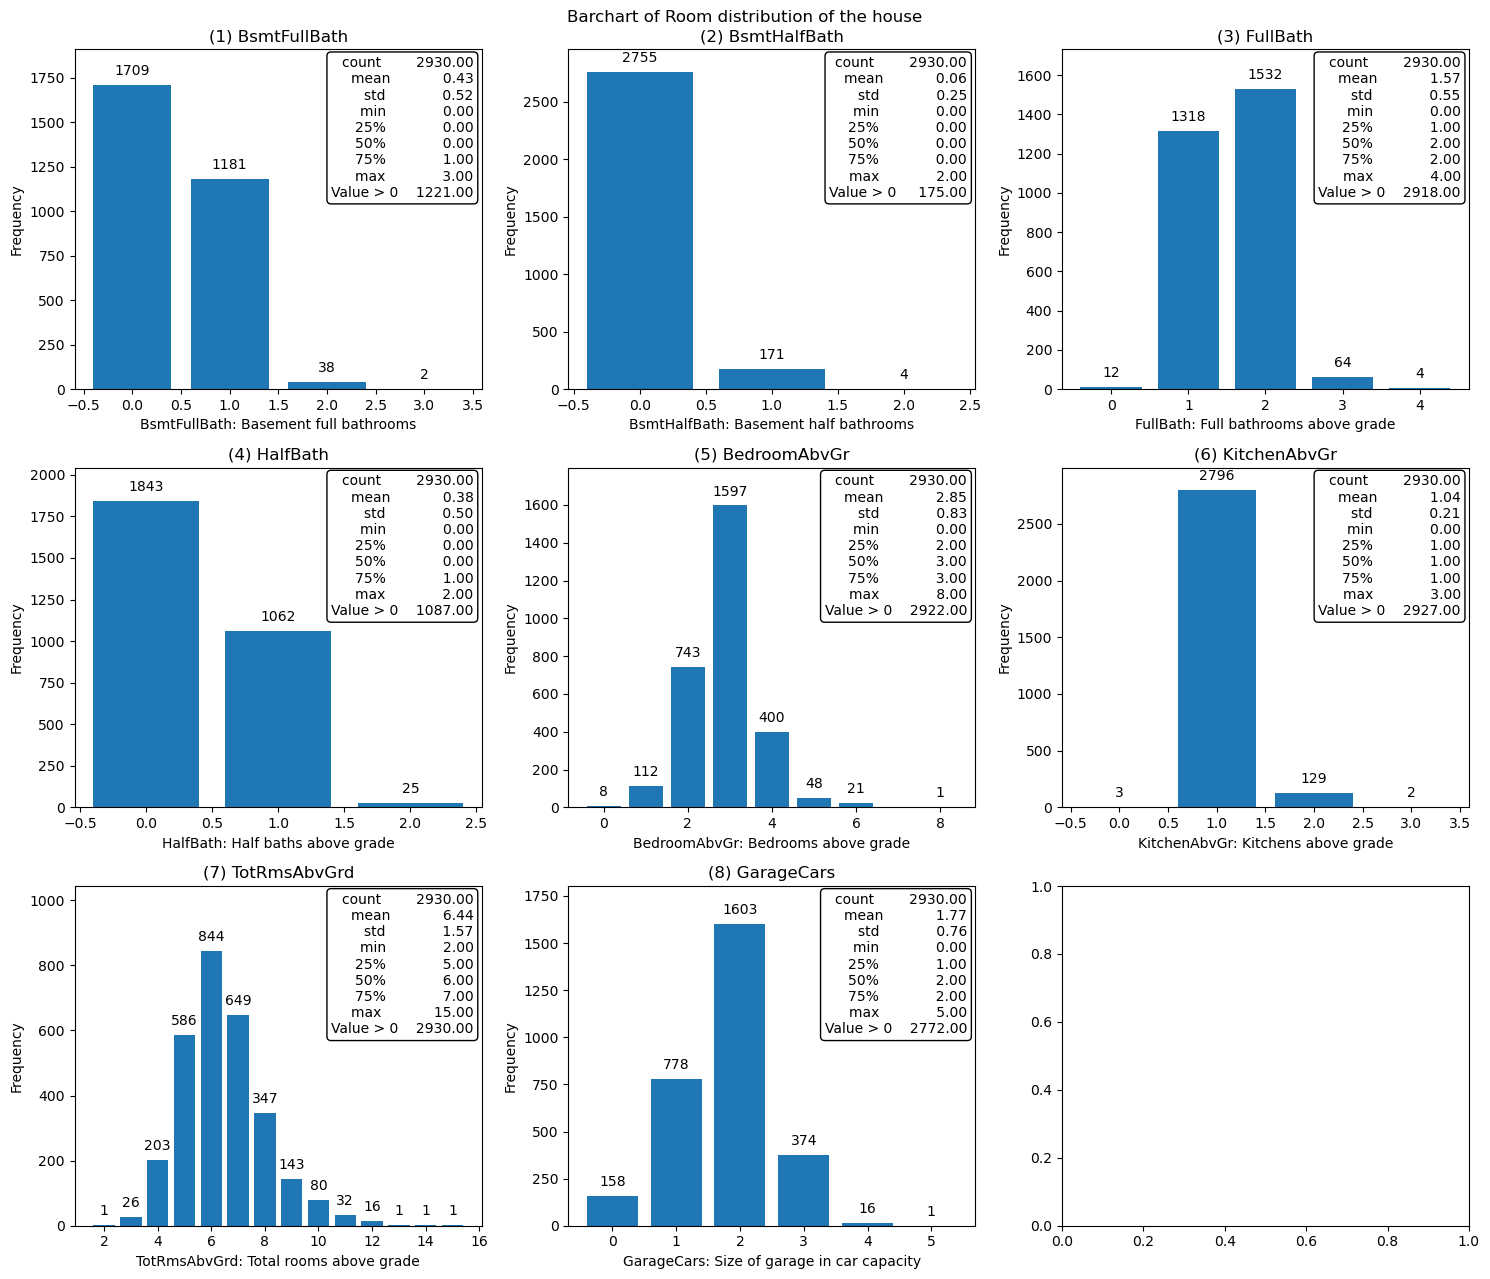

In [25]:
lst_s1 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
'TotRmsAbvGrd', 'GarageCars']
data_s1 = pd.concat((data.loc[:,lst_s1],data.loc[:,"SalePrice"]),axis=1)
data_s1
title_BsmtFullBath ='''BsmtFullBath: Basement full bathrooms'''
title_BsmtHalfBath ='''BsmtHalfBath: Basement half bathrooms'''
title_FullBath ='''FullBath: Full bathrooms above grade'''
title_HalfBath ='''HalfBath: Half baths above grade'''
title_Bedroom ='''BedroomAbvGr: Bedrooms above grade'''
title_Kitchen ='''KitchenAbvGr: Kitchens above grade'''
title_TotRmsAbvGrd ='''TotRmsAbvGrd: Total rooms above grade'''
title_GarageCars = '''GarageCars: Size of garage in car capacity'''
title_s1 = [title_BsmtFullBath,title_BsmtHalfBath,title_FullBath,\
title_HalfBath,title_Bedroom,title_Kitchen,title_TotRmsAbvGrd,title_GarageCars]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))
fig.suptitle('Barchart of Room distribution of the house')

def custom_description(column):
    description = column.describe()
    description['Value > 0'] = (column > 0).sum()
    description = round(description,2)
    return description
# custom_description
# custom_description(des_s2.iloc[:,0])

for i, column in enumerate(data_s1[lst_s1]):
    
    ax = axes[i // 3, i % 3]  # obtain subplot index
    ax.bar(data_s1[column].value_counts().index, data_s1[column].value_counts())
    ax.set_title(f"({i + 1}) " + lst_s1[i])
    ax.set_xlabel(title_s1[i])
    ax.set_ylabel('Frequency')
    ax.set_ylim(0,max(data_s1[column].value_counts())+200)
    ax.text(0.98, 0.98, f'{custom_description(data_s1.iloc[:,i]).to_string(header=False)}',\
        transform=ax.transAxes,ha='right', va='top',\
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

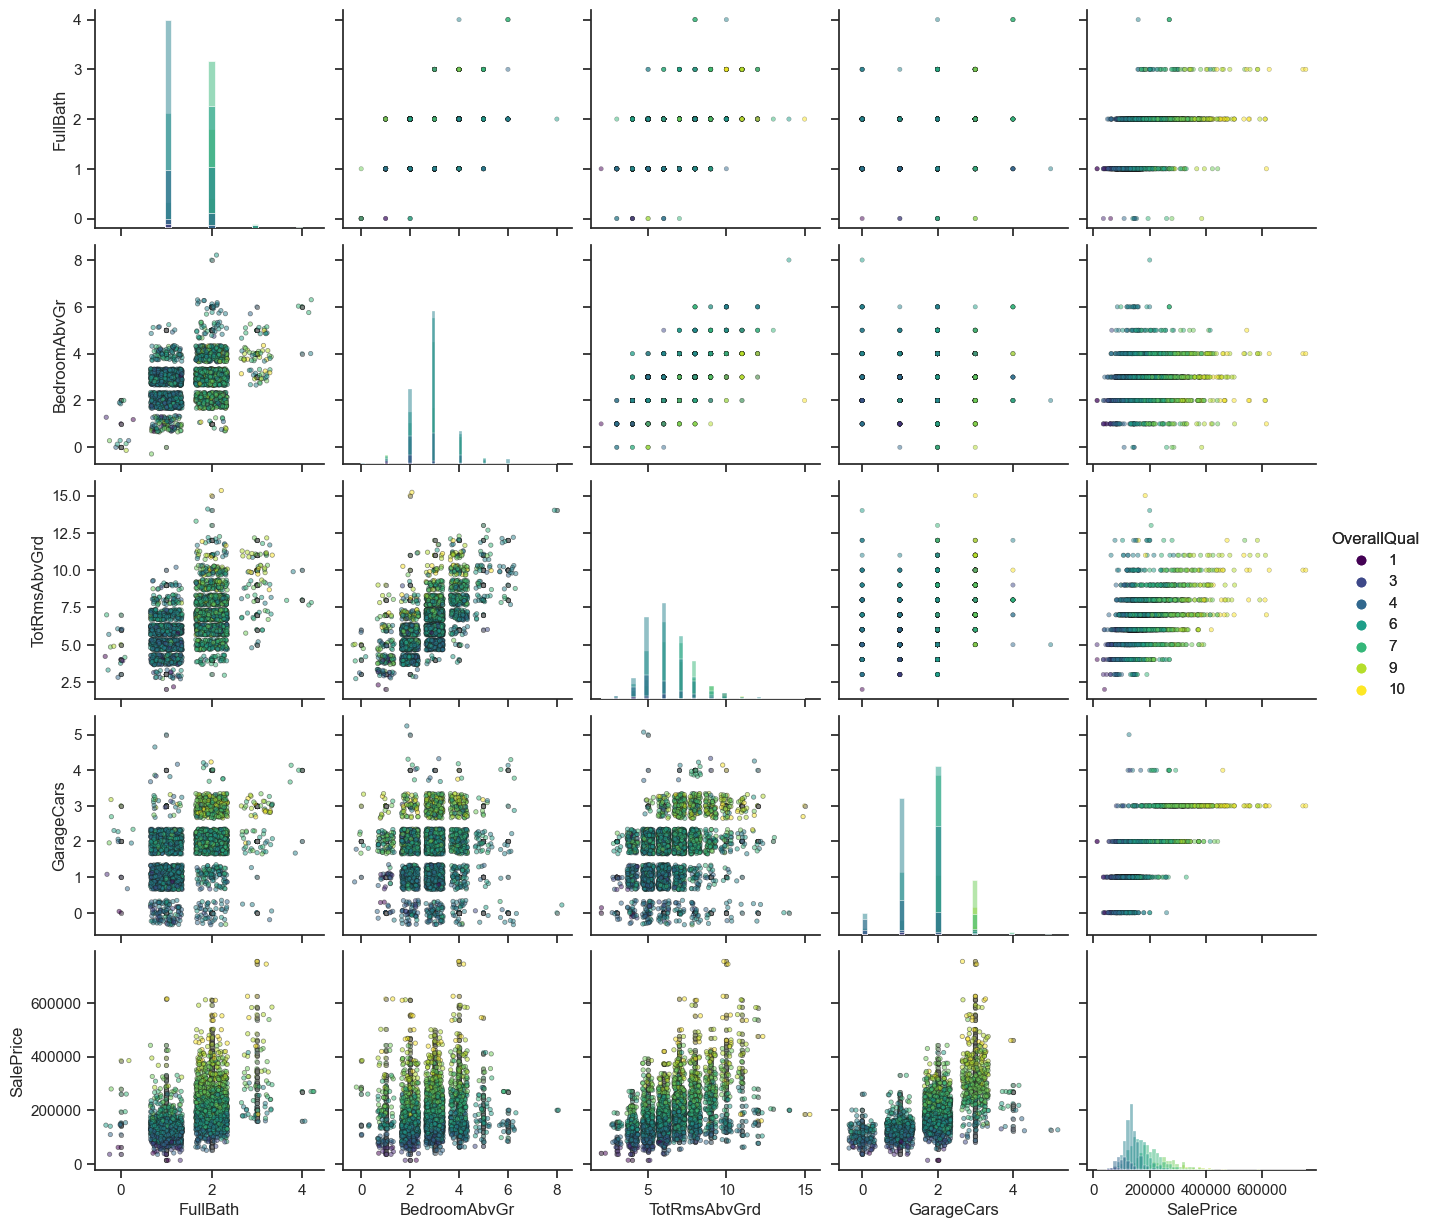

In [33]:
columns = ['FullBath', 'BedroomAbvGr','TotRmsAbvGrd', 'GarageCars','SalePrice']

# Create a DataFrame with the selected columns
df = pd.concat([data_s1[columns], data['OverallQual']], axis=1)

# Add jitter to the scatter plots in the pairplot
sns.set(style="ticks")
g = sns.pairplot(df, hue='OverallQual', diag_kind='hist', palette='viridis', plot_kws={'alpha': 0.5, 's': 10, 'edgecolor': 'k'}, diag_kws={'alpha': 0.5})

# Adjust the jitter amount
jitter = 0.35
for j,i  in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].scatter(df.iloc[:, j], df.iloc[:, i], alpha=0.5, s=10, edgecolor='k', c='gray', marker='o', linewidth=0.5)
    g.axes[i, j].scatter(df.iloc[:, j] + np.random.uniform(-jitter, jitter, len(df)), df.iloc[:, i] + np.random.uniform(-jitter, jitter, len(df)), alpha=0.5, s=10, edgecolor='k', c=df['OverallQual'], cmap='viridis', linewidth=0.5)

g.add_legend(title='OverallQual')
plt.show()


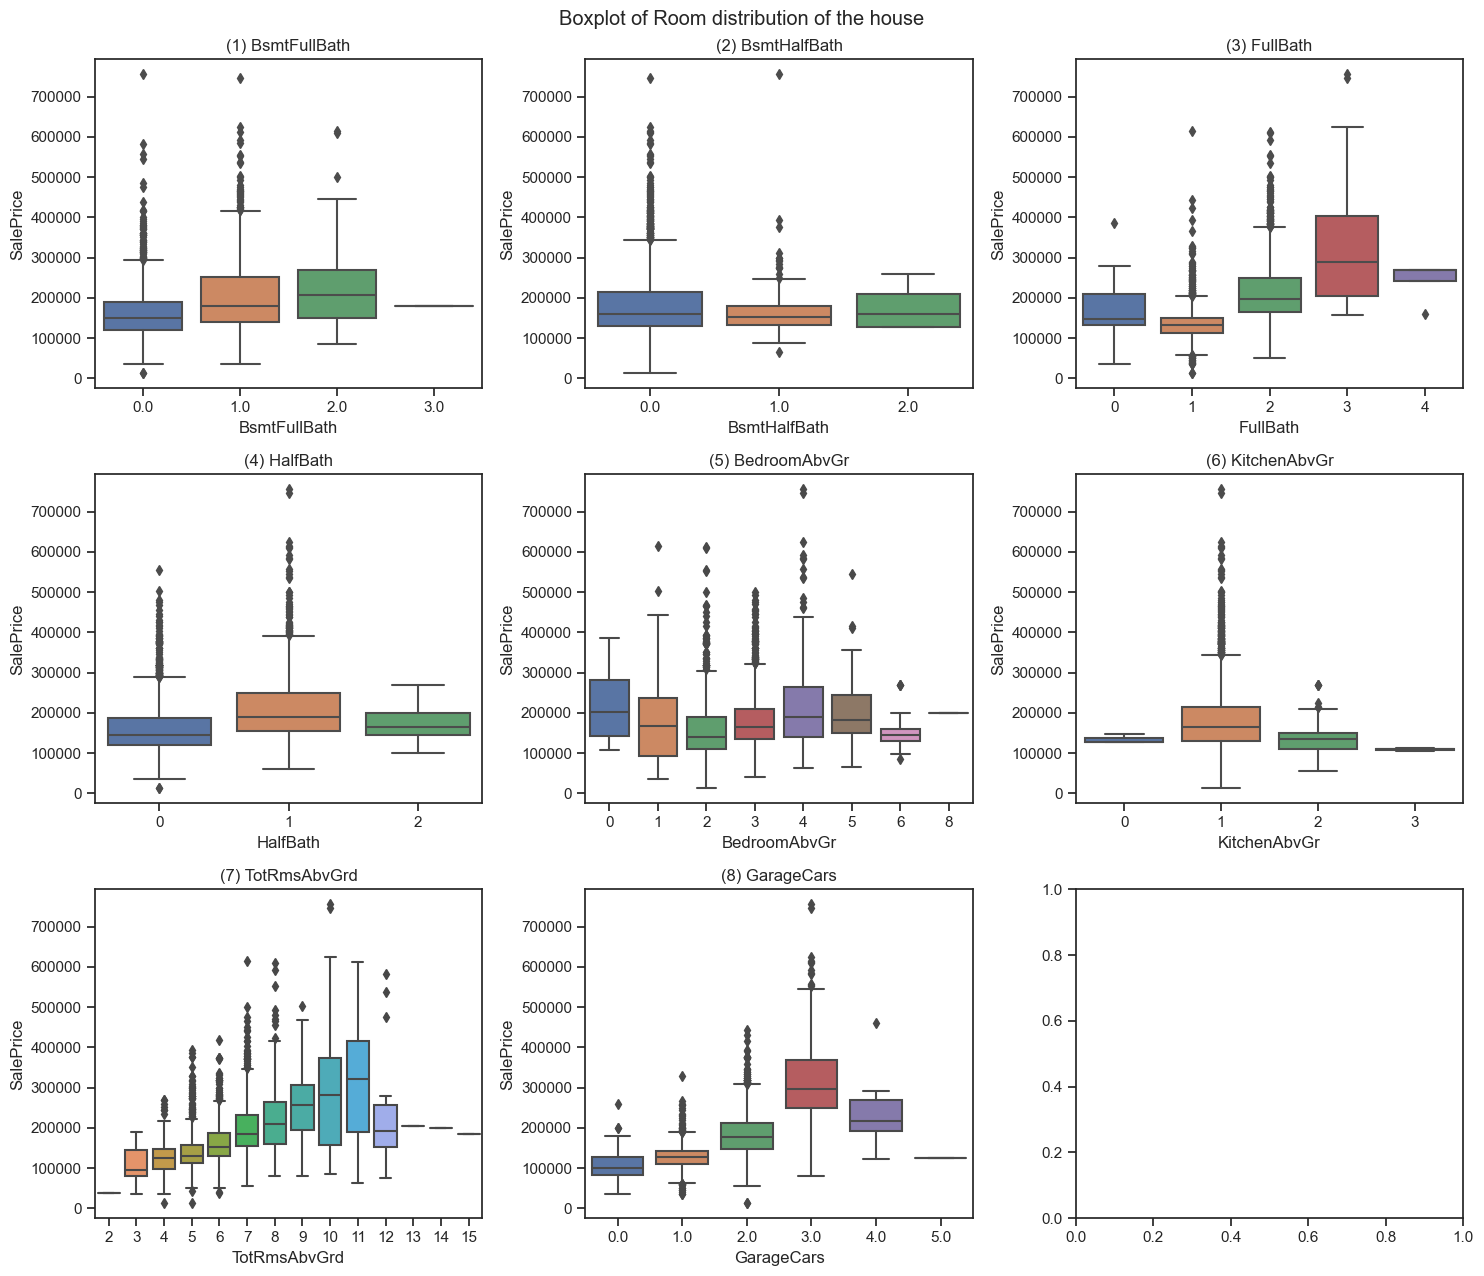

In [37]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))
fig.suptitle('Boxplot of Room distribution of the house')


for i, column in enumerate(data_s1[lst_s1]):
    
    ax = axes[i // 3, i % 3]  # obtain subplot index
    sns.boxplot(data=data_s1,x = data[column], y =  data['SalePrice'],ax =ax)
    ax.set_title(f"({i + 1}) " + lst_s1[i])
    ax.set_ylabel('SalePrice')
    
plt.tight_layout()
plt.show()

MSZoning RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MSZoning, dtype: int64
LotConfig Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Condition1 Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Condition2 Norm      2900
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
LotShape Reg    1859
IR1     979
IR2      76
IR3      16
Name: LotShape, dtype: int64
LandContour Lvl    2633
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
LandSlope Gtl    2789
Mod     125
Sev      16
Name: LandSlope, dtype: int64


C:\Users\T480S\AppData\Local\Temp\ipykernel_4292\545249225.py:71: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


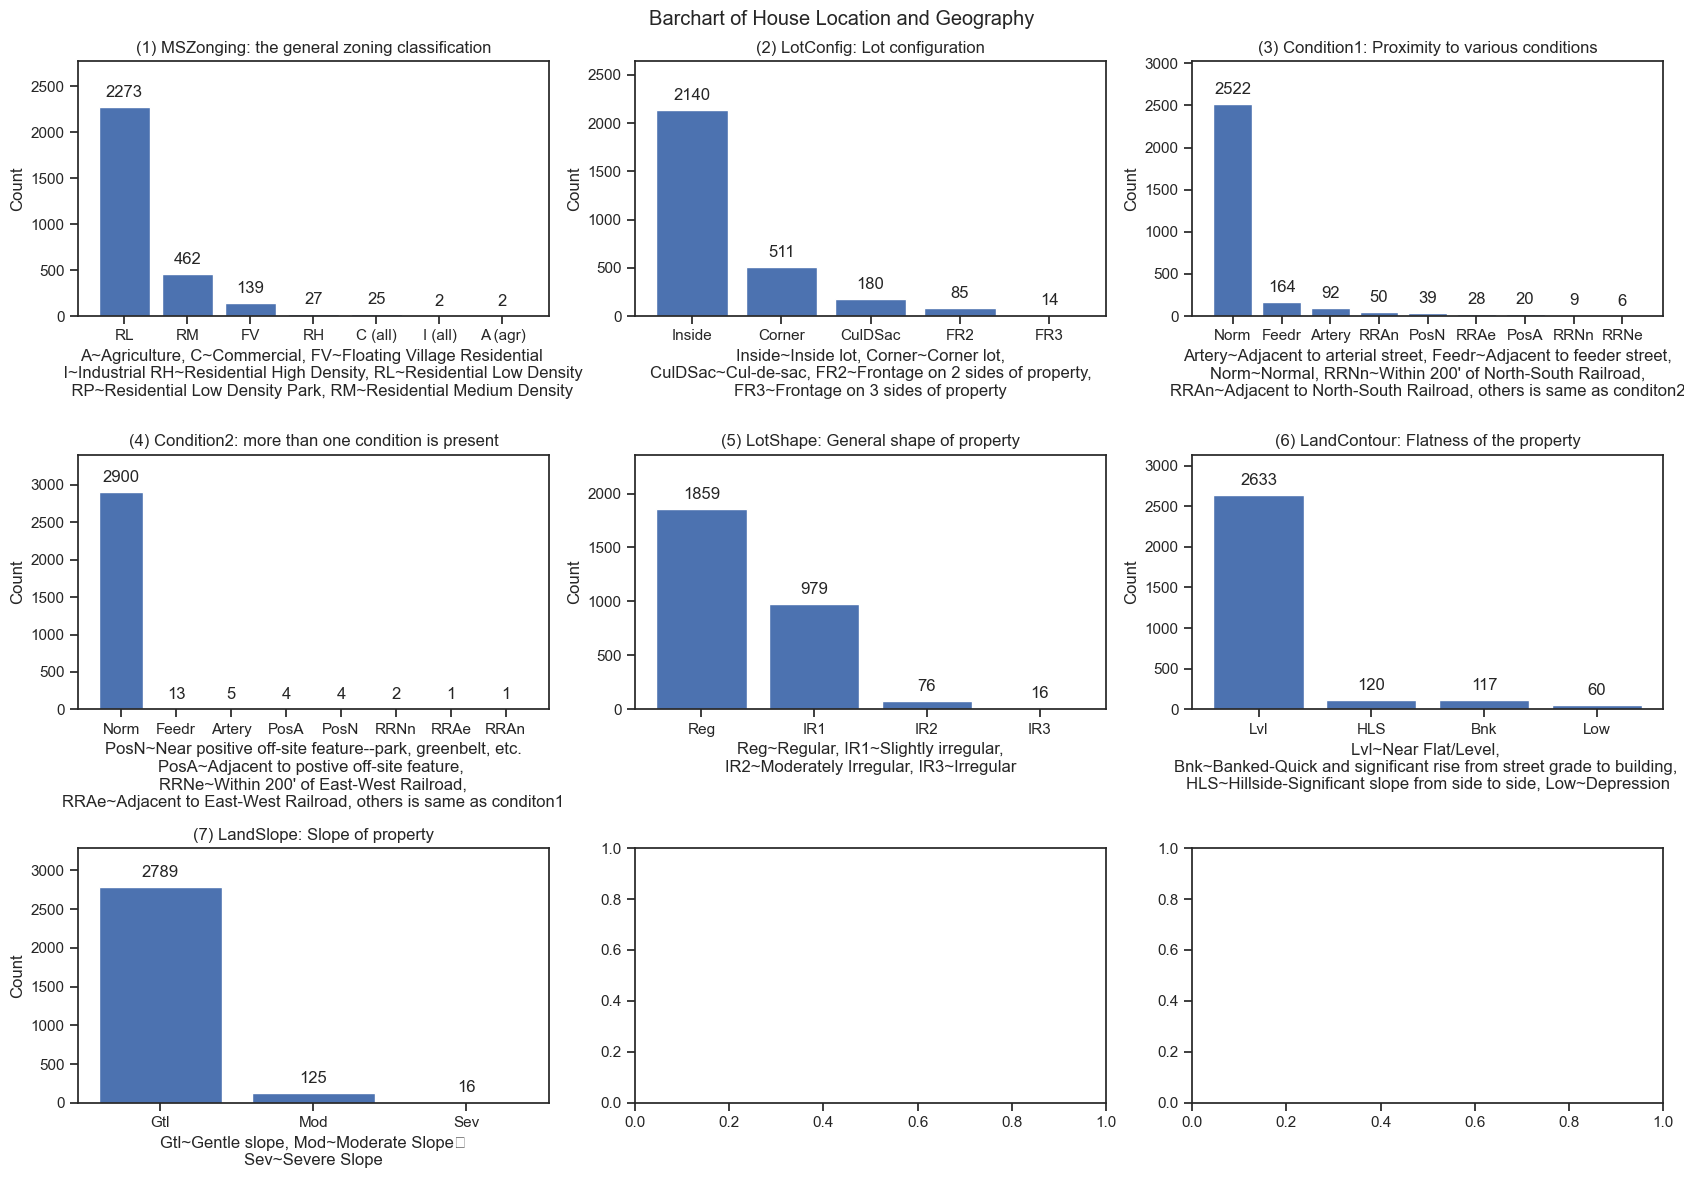

In [54]:
lst_location = ["MSZoning","LotConfig","Condition1","Condition2",\
    "LotShape","LandContour","LandSlope"]
data_location = data[lst_location]
value_counts = []
for i in lst_location:
    value_counts_temp = data[i].value_counts(dropna=False)
    print(i,value_counts_temp)
    value_counts.append(value_counts_temp)
    
str_MSZonging = '''A~Agriculture, C~Commercial, FV~Floating Village Residential 
    I~Industrial RH~Residential High Density, RL~Residential Low Density
    RP~Residential Low Density Park, RM~Residential Medium Density
    '''
title_MSZonging = '''MSZonging: the general zoning classification'''

str_LotConfig = '''Inside~Inside lot, Corner~Corner lot,
CulDSac~Cul-de-sac, FR2~Frontage on 2 sides of property,
FR3~Frontage on 3 sides of property'''
title_LotConfig = '''LotConfig: Lot configuration'''

title_Condition1 ='''Condition1: Proximity to various conditions'''
str_Condition1 = '''Artery~Adjacent to arterial street, Feedr~Adjacent to feeder street,
Norm~Normal, RRNn~Within 200' of North-South Railroad,
RRAn~Adjacent to North-South Railroad, others is same as conditon2'''

title_Condition2 ='''Condition2: more than one condition is present'''
str_Condition2 = '''PosN~Near positive off-site feature--park, greenbelt, etc.
PosA~Adjacent to postive off-site feature, 
RRNe~Within 200' of East-West Railroad,
RRAe~Adjacent to East-West Railroad, others is same as conditon1'''

title_LotShape ='''LotShape: General shape of property'''   
str_LotShape = '''Reg~Regular, IR1~Slightly irregular,
IR2~Moderately Irregular, IR3~Irregular'''

title_LandContour = '''LandContour: Flatness of the property'''
str_LandContour = '''Lvl~Near Flat/Level, 
Bnk~Banked-Quick and significant rise from street grade to building, 
HLS~Hillside-Significant slope from side to side, Low~Depression'''

title_LandSlope = '''LandSlope: Slope of property'''
str_LandSlope = '''Gtl~Gentle slope, Mod~Moderate Slope	
Sev~Severe Slope'''
	   

	   
title = [title_MSZonging,title_LotConfig,title_Condition1,title_Condition2,\
    title_LotShape,title_LandContour,title_LandSlope]
str_ = [str_MSZonging,str_LotConfig,str_Condition1,str_Condition2,\
    str_LotShape,str_LandContour,str_LandSlope]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 12))

fig.suptitle('Barchart of House Location and Geography')

for i, column in enumerate(data_location):
   
    value_counts_location = data_location[column].value_counts()
    
    ax = axes[i//3, i%3]  
    ax.bar(value_counts_location.index, value_counts_location.values)
    ax.set_title(f"({i+1}) "+title[i])

    ax.set_xlabel(str_[i])
    ax.set_ylabel('Count')
    
    ax.set_ylim(0,max(data_location[column].value_counts())+500)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

C:\Users\T480S\AppData\Local\Temp\ipykernel_4292\552606290.py:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


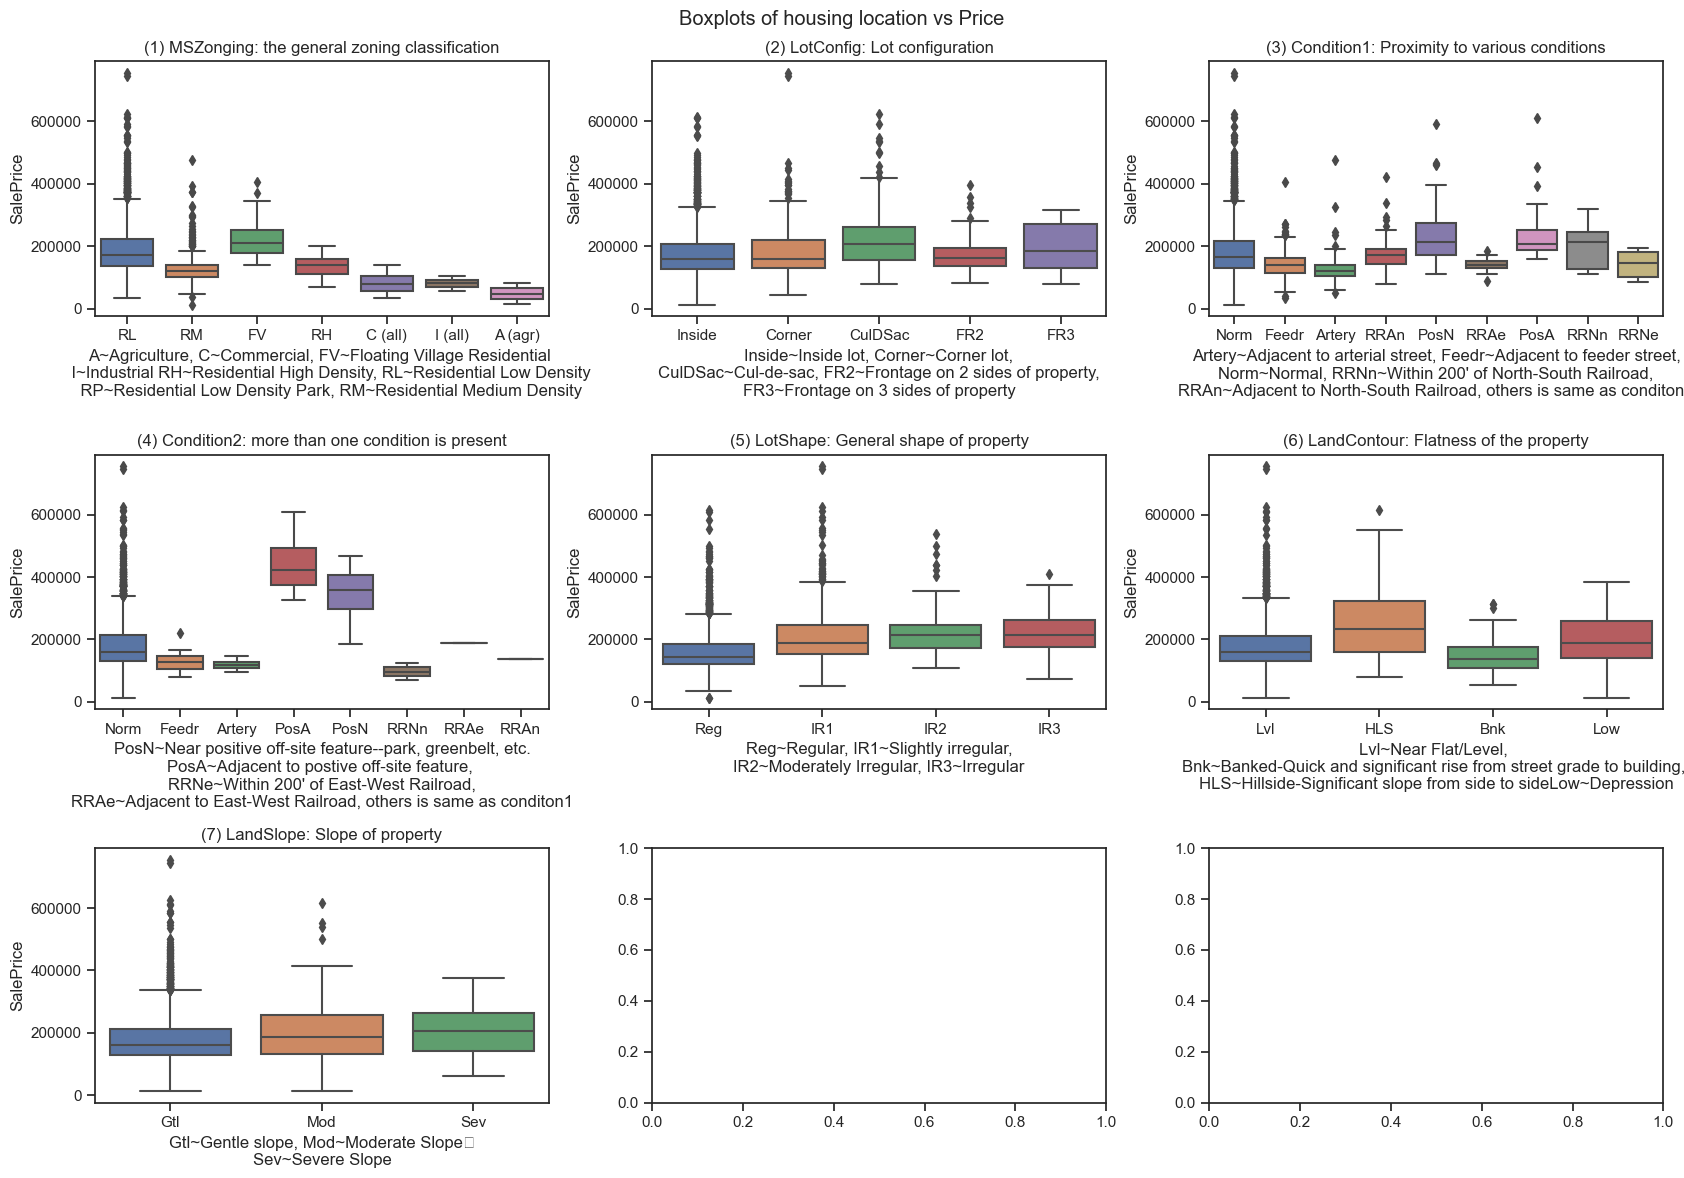

In [53]:
data_boxplot = pd.concat([data_location, data['SalePrice']], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 12))

fig.suptitle('Boxplots of housing location vs Price')

for i, column in enumerate(data_location):
    ax = axes[i//3, i%3]  # 获取当前子图的轴对象
    sns.boxplot(x=column, y='SalePrice', data=data_boxplot,ax=ax,order=value_counts[i].index)
    
    ax.set_title(f"({i+1}) {title[i]}")
    
    ax.set_xlabel(str_[i])
    ax.set_ylabel('SalePrice')
    #ax.text(0.98, 0.98, f'{value_counts[i]}', transform=ax.transAxes,
                #ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

1122.6725412880455 2.5924998361470904e-239


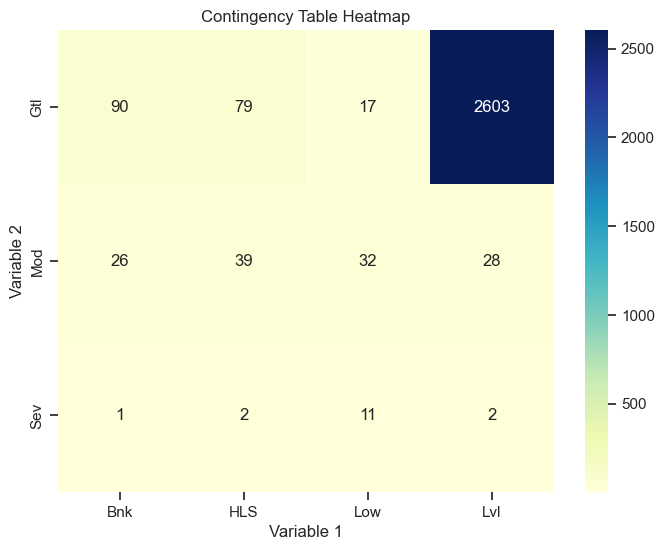

In [63]:
lst_geo = ["LotShape","LandContour","LandSlope"]
data_geo = data[lst_geo].astype("object")
data_geo.describe()
observed = pd.crosstab(data_geo['LandSlope'], data_geo['LandContour'])

# 执行卡方检验
chi2, p_value, _, _ = chi2_contingency(observed)
print(chi2,p_value)
plt.figure(figsize=(8, 6))
sns.heatmap(observed, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Contingency Table Heatmap')
plt.show()

In [59]:
df1.head()

LotShape LandContour LandSlope  OverallQual  SalePrice
0      IR1         Lvl       Gtl            6     215000
1      Reg         Lvl       Gtl            5     105000
2      IR1         Lvl       Gtl            6     172000
3      Reg         Lvl       Gtl            7     244000
4      IR1         Lvl       Gtl            5     189900

Heating GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64
CentralAir Y    2734
N     196
Name: CentralAir, dtype: int64
Electrical SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
None        1
Mix         1
Name: Electrical, dtype: int64
Fireplaces 0    1422
1    1274
2     221
3      12
4       1
Name: Fireplaces, dtype: int64
MiscFeature None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: MiscFeature, dtype: int64


C:\Users\T480S\AppData\Local\Temp\ipykernel_4292\1425341414.py:55: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


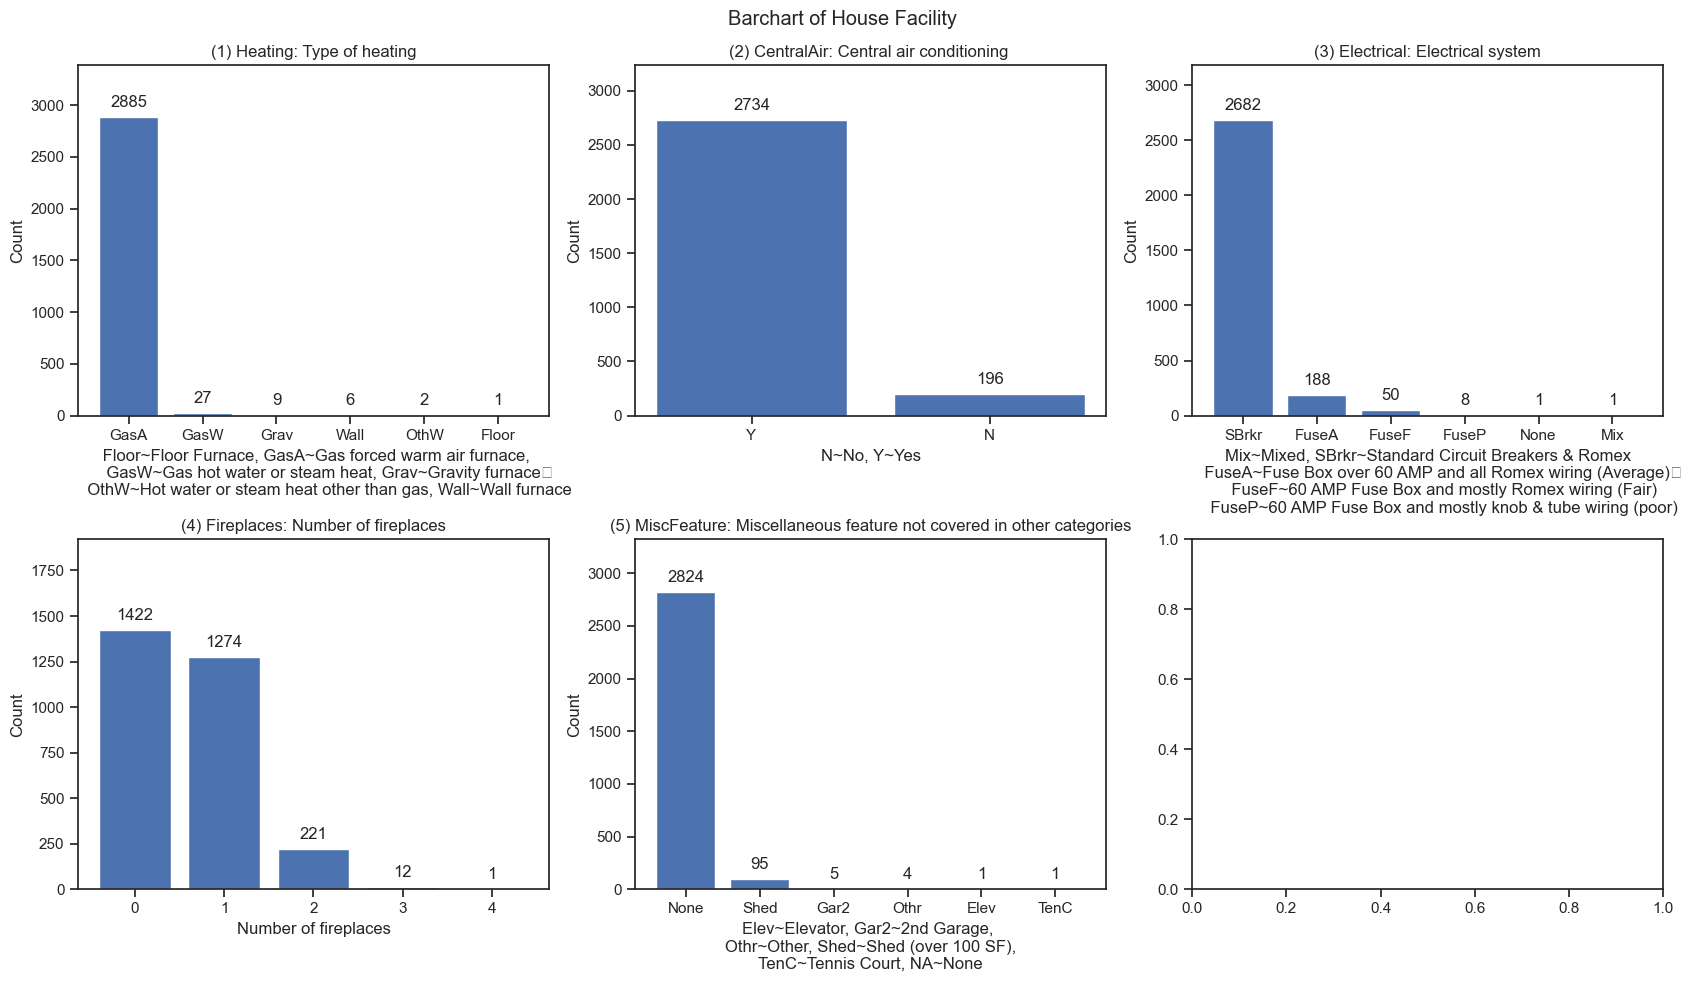

In [74]:
lst_facility = ["Heating","CentralAir","Electrical","Fireplaces","MiscFeature"]
data_facility = data[lst_facility]
value_counts = []
for i in lst_facility:
    value_counts_temp = data[i].value_counts(dropna=False)
    print(i,value_counts_temp)
    value_counts.append(value_counts_temp)
    
str_Heating = ''' Floor~Floor Furnace, GasA~Gas forced warm air furnace,
       GasW~Gas hot water or steam heat, Grav~Gravity furnace	
       OthW~Hot water or steam heat other than gas, Wall~Wall furnace'''
title_Heating = '''Heating: Type of heating'''

str_CentralAir = '''N~No, Y~Yes'''
title_CentralAir = '''CentralAir: Central air conditioning '''

str_Electrical = '''Mix~Mixed, SBrkr~Standard Circuit Breakers & Romex
       FuseA~Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF~60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP~60 AMP Fuse Box and mostly knob & tube wiring (poor)'''
title_Electrical = '''Electrical: Electrical system'''
		
title_Fireplaces = '''Fireplaces: Number of fireplaces'''
str_Fireplaces = '''Number of fireplaces'''

title_MiscFeature = '''MiscFeature: Miscellaneous feature not covered in other categories'''
str_MiscFeature = '''Elev~Elevator, Gar2~2nd Garage, 
Othr~Other, Shed~Shed (over 100 SF),
TenC~Tennis Court, NA~None'''		


	   
title = [title_Heating,title_CentralAir,title_Electrical,title_Fireplaces,title_MiscFeature]
str_ = [str_Heating,str_CentralAir,str_Electrical,str_Fireplaces,str_MiscFeature]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))

fig.suptitle('Barchart of House Facility')

for i, column in enumerate(data_facility):
   
    value_counts_location = data_facility[column].value_counts()
    
    ax = axes[i//3, i%3]  
    ax.bar(value_counts_location.index, value_counts_location.values)
    ax.set_title(f"({i+1}) "+title[i])

    ax.set_xlabel(str_[i])
    ax.set_ylabel('Count')
    
    ax.set_ylim(0,max(data_facility[column].value_counts())+500)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

C:\Users\T480S\AppData\Local\Temp\ipykernel_4292\1354133116.py:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


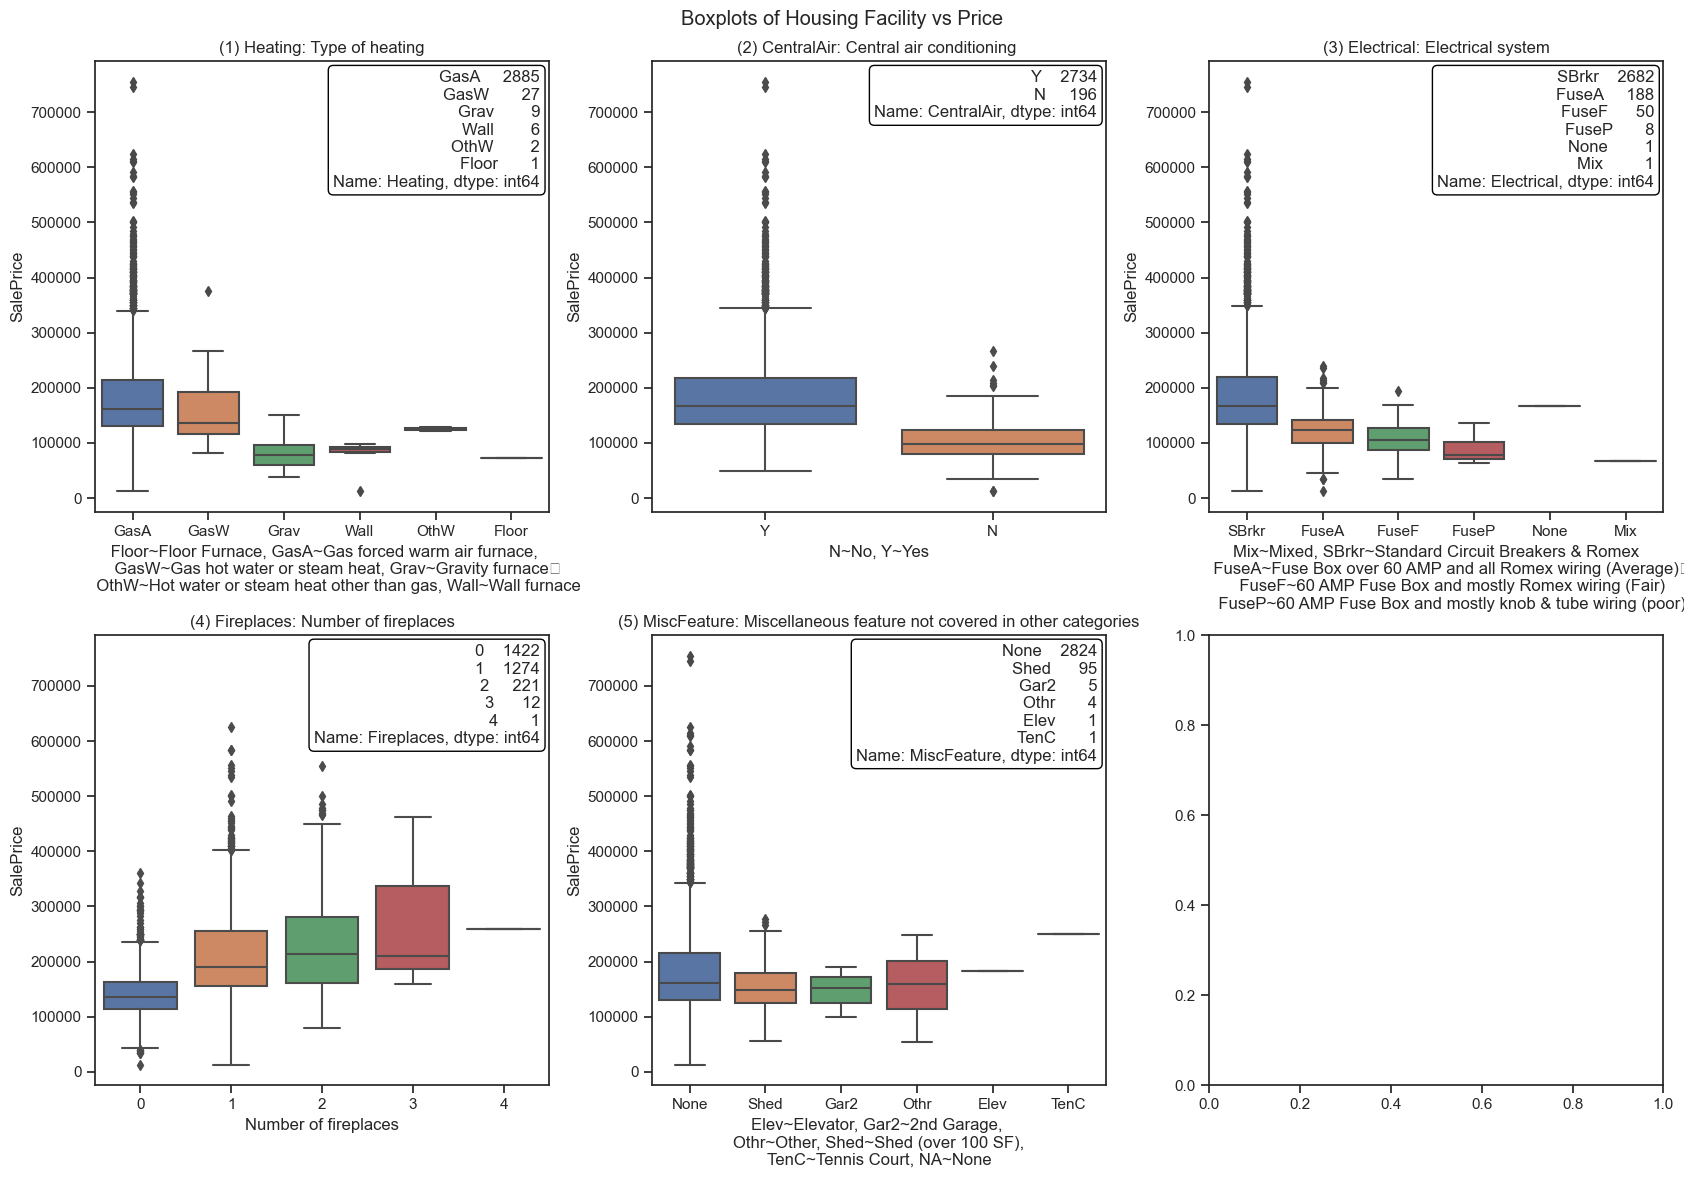

In [77]:
data_boxplot = pd.concat([data_facility, data['SalePrice']], axis=1)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 12))

fig.suptitle('Boxplots of Housing Facility vs Price')

for i, column in enumerate(data_facility):
    ax = axes[i//3, i%3]  # 获取当前子图的轴对象
    sns.boxplot(x=column, y='SalePrice', data=data_boxplot,ax=ax,order=value_counts[i].index)
    
    ax.set_title(f"({i+1}) {title[i]}")
    
    ax.set_xlabel(str_[i])
    ax.set_ylabel('SalePrice')
    ax.text(0.98, 0.98, f'{value_counts[i]}', transform=ax.transAxes,
                ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

Heating CentralAir Electrical  Fireplaces MiscFeature  SalePrice  \
0       GasA          Y      SBrkr           2        None     215000   
1       GasA          Y      SBrkr           0        None     105000   
2       GasA          Y      SBrkr           0        Gar2     172000   
3       GasA          Y      SBrkr           2        None     244000   
4       GasA          Y      SBrkr           1        None     189900   
...      ...        ...        ...         ...         ...        ...   
2925    GasA          Y      SBrkr           0        None     142500   
2926    GasA          Y      SBrkr           0        None     131000   
2927    GasA          Y      SBrkr           0        Shed     132000   
2928    GasA          Y      SBrkr           1        None     170000   
2929    GasA          Y      SBrkr           1        None     188000   

      SalePrice  
0        215000  
1        105000  
2        172000  
3        244000  
4        189900  
...         ...  
2925     142500  
2926     131000  
2927     132000  
2928     170000  
2929     188000  

[2930 rows x 7 columns]

OverallQual 5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64
OverallCond 5    1654
6     533
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64
ExterQual TA    1799
Gd     989
Ex     107
Fa      35
Name: ExterQual, dtype: int64
ExterCond TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
BsmtQual TA      1283
Gd      1219
Ex       258
Fa        88
None      80
Po         2
Name: BsmtQual, dtype: int64
BsmtCond TA      2616
Gd       122
Fa       104
None      80
Po         5
Ex         3
Name: BsmtCond, dtype: int64


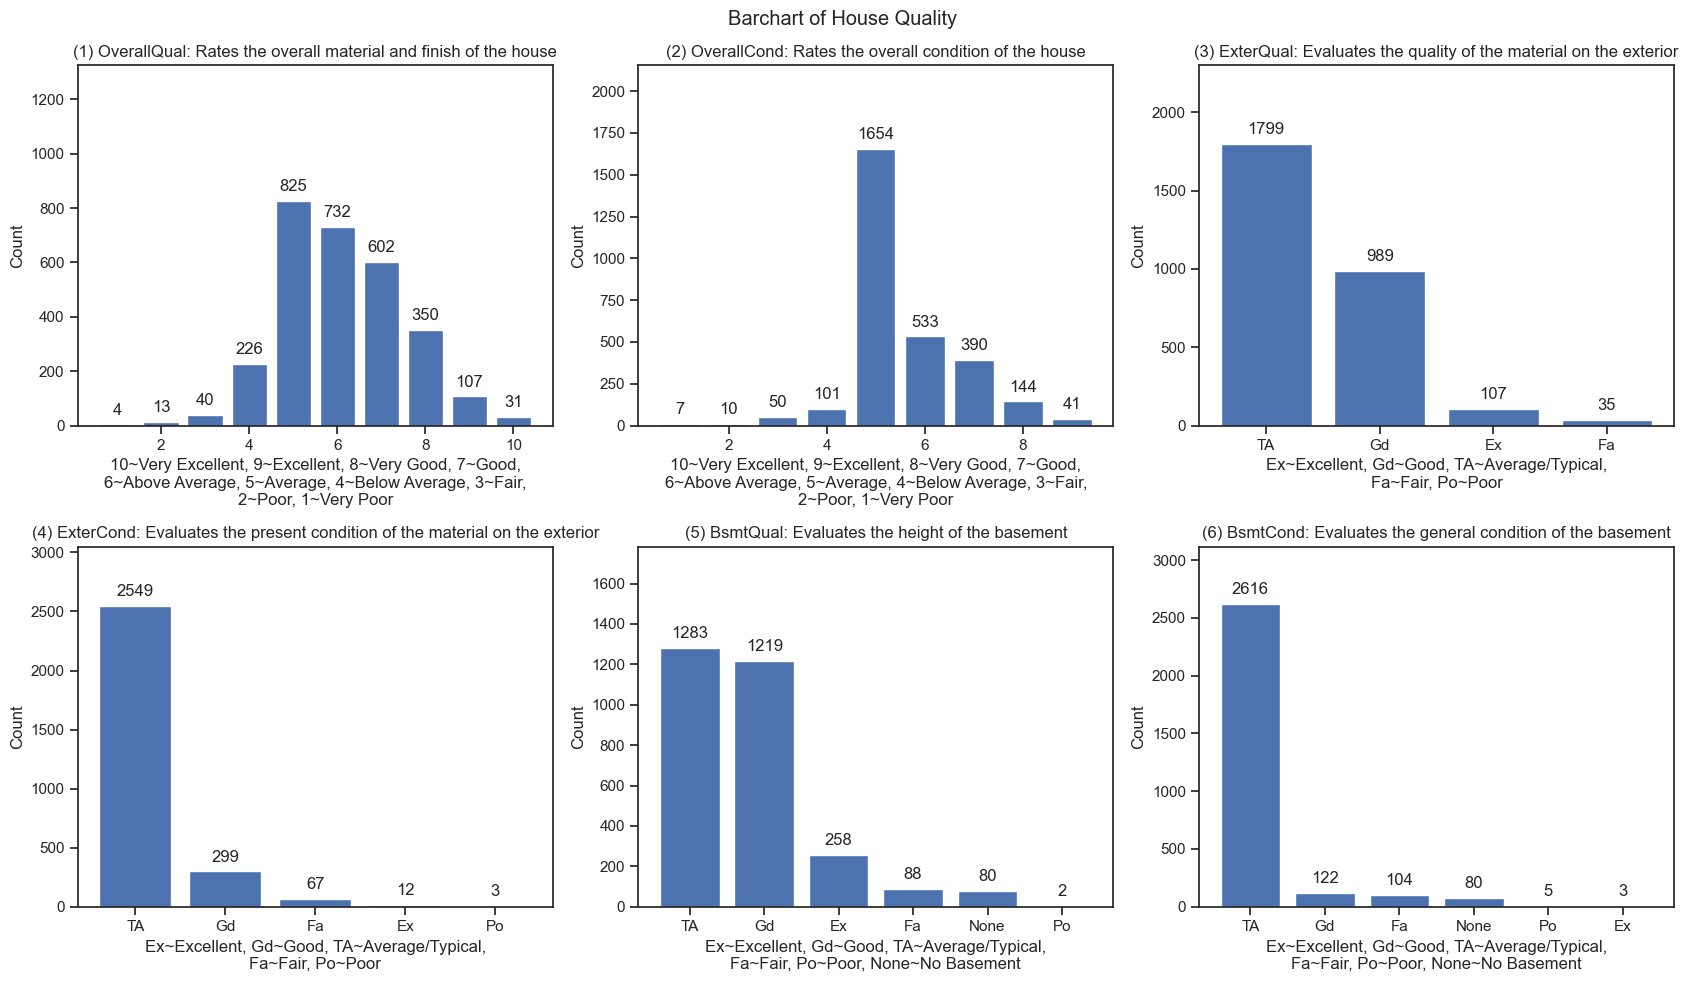

In [80]:
lst_quality = ["OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond"]
data_quality= data[lst_quality]
value_counts = []
for i in lst_quality:
    value_counts_temp = data[i].value_counts(dropna=False)
    print(i,value_counts_temp)
    value_counts.append(value_counts_temp)

title_OverallQual = '''OverallQual: Rates the overall material and finish of the house'''
str_OverallQual = '''10~Very Excellent, 9~Excellent, 8~Very Good, 7~Good,
6~Above Average, 5~Average, 4~Below Average, 3~Fair,
2~Poor, 1~Very Poor'''
	
title_OverallCond = '''OverallCond: Rates the overall condition of the house'''
str_OverallCond = '''10~Very Excellent, 9~Excellent, 8~Very Good, 7~Good,
6~Above Average, 5~Average, 4~Below Average, 3~Fair,
2~Poor, 1~Very Poor'''

title_ExterQual= '''ExterQual: Evaluates the quality of the material on the exterior'''
str_ExterQual = '''Ex~Excellent, Gd~Good, TA~Average/Typical,
Fa~Fair, Po~Poor'''	

title_ExterCond= '''ExterCond: Evaluates the present condition of the material on the exterior'''
str_ExterCond = '''Ex~Excellent, Gd~Good, TA~Average/Typical,
Fa~Fair, Po~Poor'''	

title_BsmtQual = '''BsmtQual: Evaluates the height of the basement'''
str_BsmtQual = '''Ex~Excellent, Gd~Good, TA~Average/Typical,
Fa~Fair, Po~Poor, None~No Basement'''
		
title_BsmtCond = '''BsmtCond: Evaluates the general condition of the basement'''
str_BsmtCond = '''Ex~Excellent, Gd~Good, TA~Average/Typical,
Fa~Fair, Po~Poor, None~No Basement'''

title = [title_OverallQual,title_OverallCond,title_ExterQual,title_ExterCond,title_BsmtQual,title_BsmtCond]
str_ = [str_OverallQual,str_OverallCond,str_ExterQual,str_ExterCond,str_BsmtQual,str_BsmtCond]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))

fig.suptitle('Barchart of House Quality')

for i, column in enumerate(data_quality):
   
    value_counts_location = data_quality[column].value_counts()
    
    ax = axes[i//3, i%3]  
    ax.bar(value_counts_location.index, value_counts_location.values)
    ax.set_title(f"({i+1}) "+title[i])

    ax.set_xlabel(str_[i])
    ax.set_ylabel('Count')
    
    ax.set_ylim(0,max(data_quality[column].value_counts())+500)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

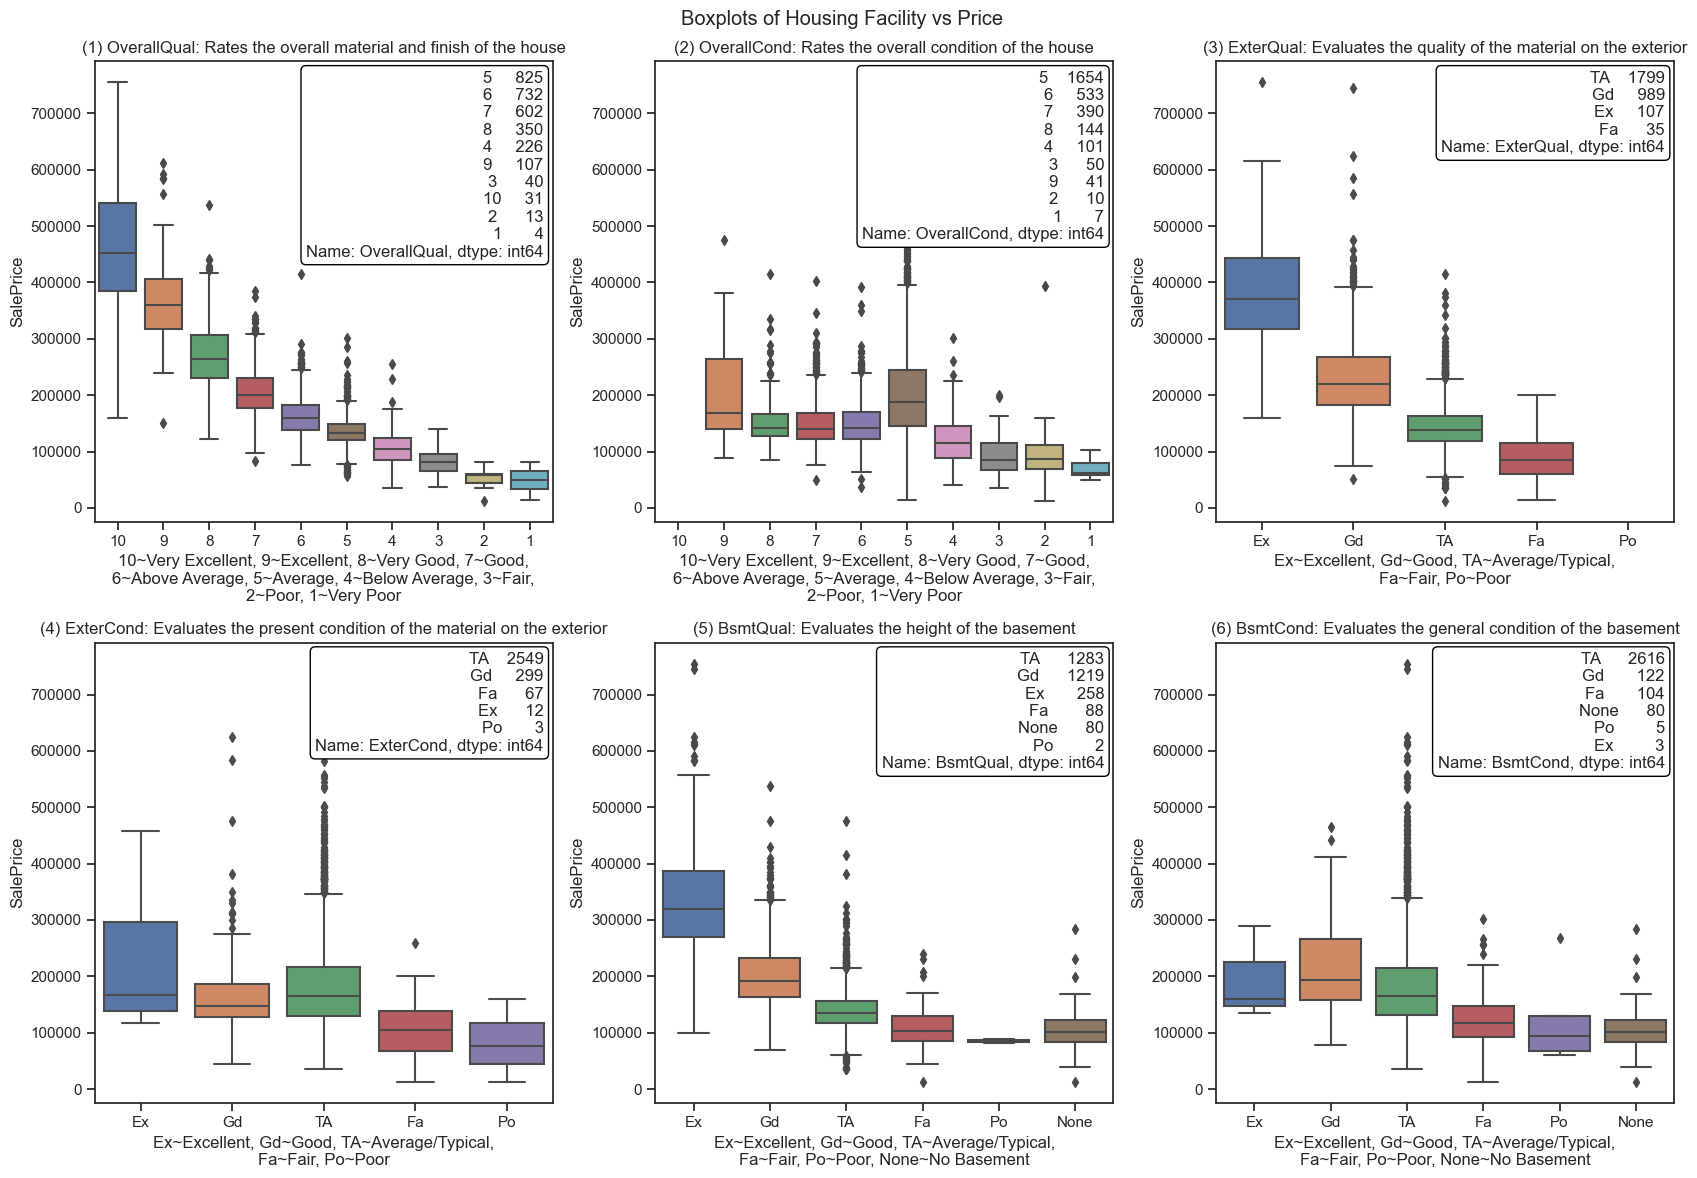

In [88]:
data_boxplot = pd.concat([data_quality, data['SalePrice']], axis=1)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 12))

fig.suptitle('Boxplots of Housing Quality vs Price')

for i, column in enumerate(data_quality):
    if i == 1 or i == 0:
        order = list(range(10, 0, -1))
    elif i ==2 or i == 3:
        order = ['Ex','Gd',	'TA','Fa','Po']
    else:
        order = ['Ex','Gd',	'TA','Fa','Po','None']
    ax = axes[i//3, i%3]  
    sns.boxplot(x=column, y='SalePrice', data=data_boxplot,ax=ax,order=order)
    
    ax.set_title(f"({i+1}) {title[i]}")
    
    ax.set_xlabel(str_[i])
    ax.set_ylabel('SalePrice')
    ax.text(0.98, 0.98, f'{value_counts[i]}', transform=ax.transAxes,
                ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

In [87]:
list(range(10, 0, -1))


[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

RoofStyle Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64
RoofMatl CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64
Exterior1st VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
PreCast       1
ImStucc       1
Name: Exterior1st, dtype: int64
Exterior2nd VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: Exterior2nd, dtype: int64
MasVnrType None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock 

C:\Users\T480S\AppData\Local\Temp\ipykernel_14200\4094211180.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts_location.index, rotation=60)
C:\Users\T480S\AppData\Local\Temp\ipykernel_14200\4094211180.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts_location.index, rotation=60)
C:\Users\T480S\AppData\Local\Temp\ipykernel_14200\4094211180.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts_location.index, rotation=60)


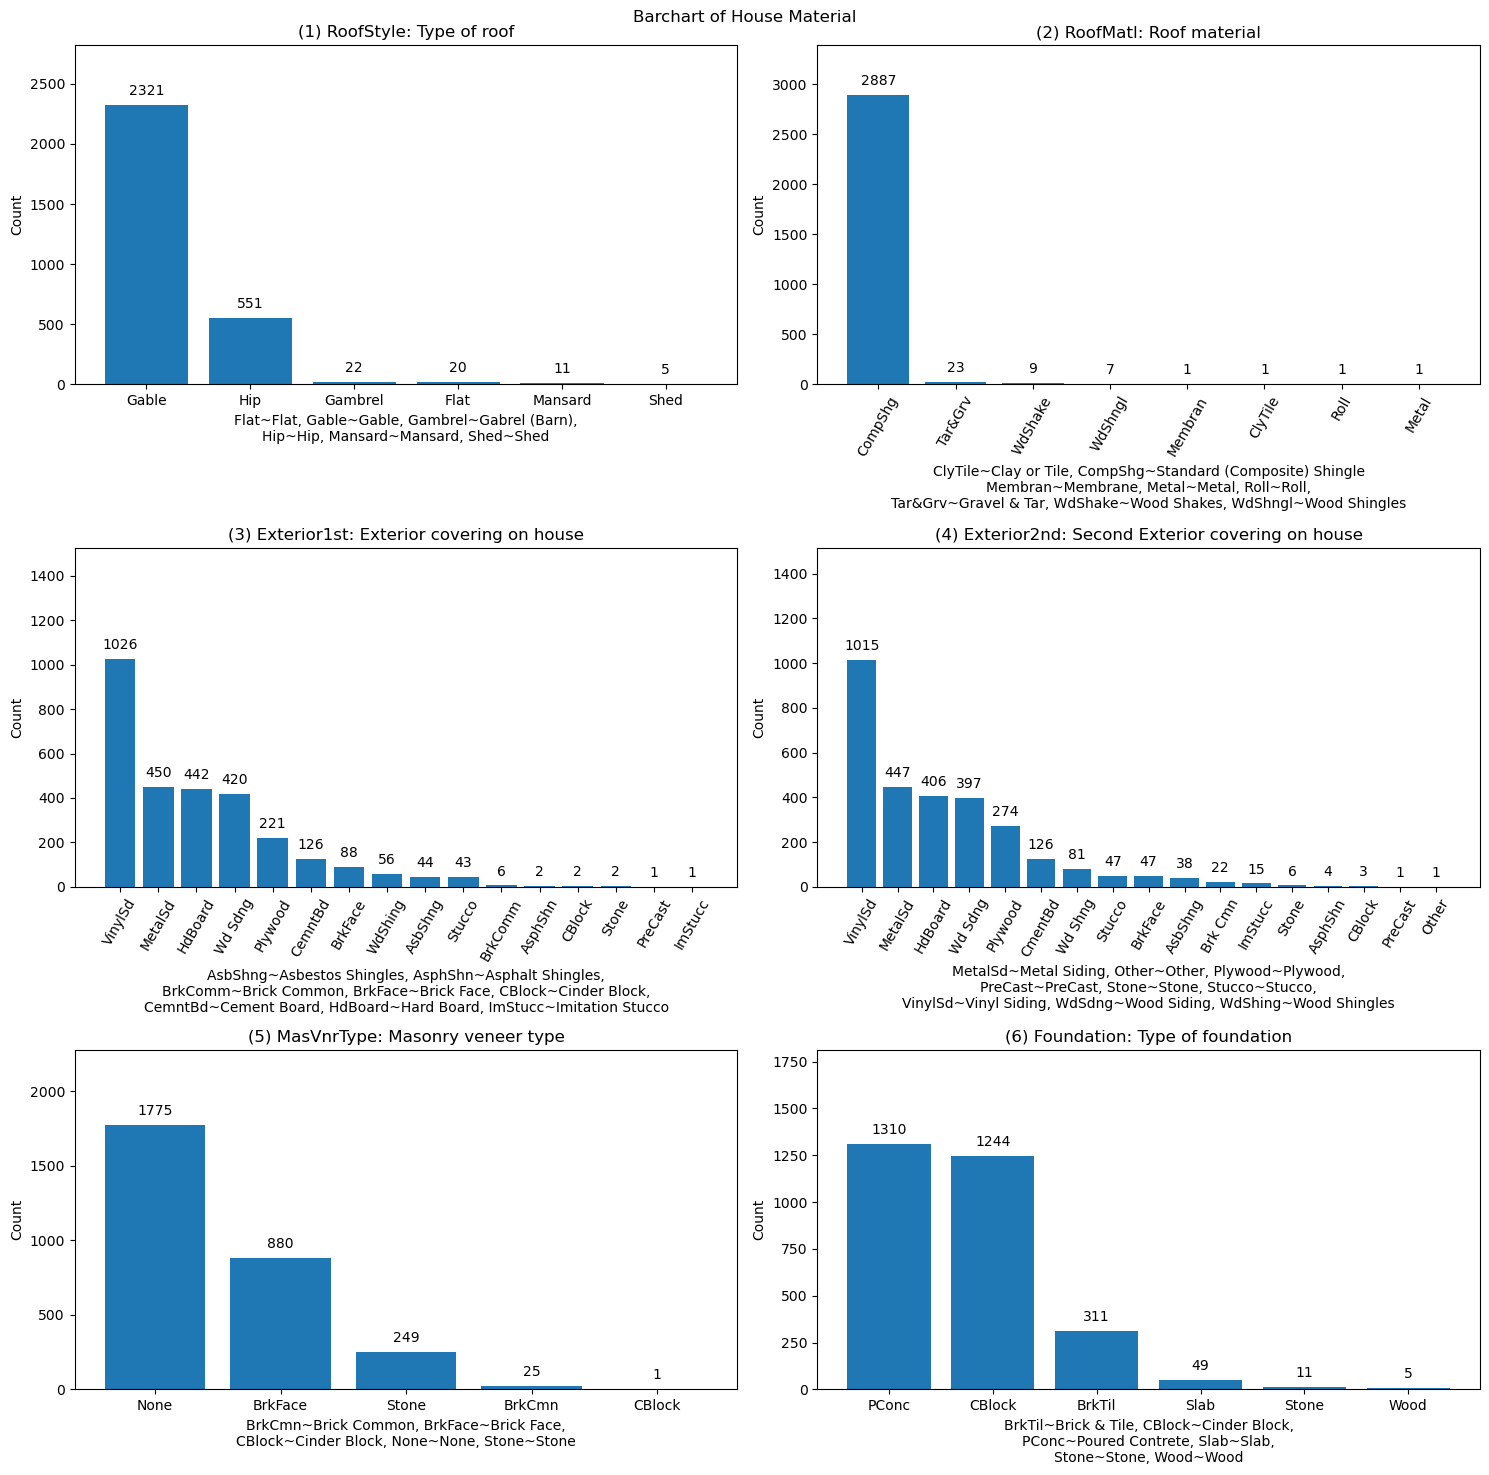

In [35]:
lst_material = ["RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation"]
data_material= data[lst_material]
value_counts = []
for i in lst_material:
    value_counts_temp = data[i].value_counts(dropna=False)
    print(i,value_counts_temp)
    value_counts.append(value_counts_temp)

title_RoofStyle = "RoofStyle: Type of roof"
str_RoofStyle = '''Flat~Flat, Gable~Gable, Gambrel~Gabrel (Barn),
Hip~Hip, Mansard~Mansard, Shed~Shed'''
		
title_RoofMatl = "RoofMatl: Roof material"
str_RoofMatl = '''ClyTile~Clay or Tile, CompShg~Standard (Composite) Shingle
Membran~Membrane, Metal~Metal, Roll~Roll,
Tar&Grv~Gravel & Tar, WdShake~Wood Shakes, WdShngl~Wood Shingles'''

title_Exterior1st = "Exterior1st: Exterior covering on house"
str_Exterior1st = '''AsbShng~Asbestos Shingles, AsphShn~Asphalt Shingles,
BrkComm~Brick Common, BrkFace~Brick Face, CBlock~Cinder Block,
CemntBd~Cement Board, HdBoard~Hard Board, ImStucc~Imitation Stucco'''

title_Exterior2nd = "Exterior2nd: Second Exterior covering on house"
str_Exterior2nd = '''MetalSd~Metal Siding, Other~Other, Plywood~Plywood,
PreCast~PreCast, Stone~Stone, Stucco~Stucco,
VinylSd~Vinyl Siding, WdSdng~Wood Siding, WdShing~Wood Shingles'''

title_MasVnrType = "MasVnrType: Masonry veneer type"
str_MasVnrType = '''BrkCmn~Brick Common, BrkFace~Brick Face,
CBlock~Cinder Block, None~None, Stone~Stone'''

title_Foundation = "Foundation: Type of foundation"
str_Foundation = '''BrkTil~Brick & Tile, CBlock~Cinder Block,
PConc~Poured Contrete, Slab~Slab,
Stone~Stone, Wood~Wood'''

title = [title_RoofStyle,title_RoofMatl,title_Exterior1st,title_Exterior2nd,title_MasVnrType,title_Foundation]
str_ = [str_RoofStyle,str_RoofMatl,str_Exterior1st,str_Exterior2nd,str_MasVnrType,str_Foundation]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

fig.suptitle('Barchart of House Material')

for i, column in enumerate(data_material):
   
    value_counts_location = data_material[column].value_counts()
    
    ax = axes[i//2, i%2]  
    ax.bar(value_counts_location.index, value_counts_location.values)
    if i > 0 and i < 4:
        ax.set_xticklabels(value_counts_location.index, rotation=60)
    ax.set_title(f"({i+1}) "+title[i])
    ax.set_xlabel(str_[i])
    ax.set_ylabel('Count')
    
    ax.set_ylim(0,max(data_material[column].value_counts())+500)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

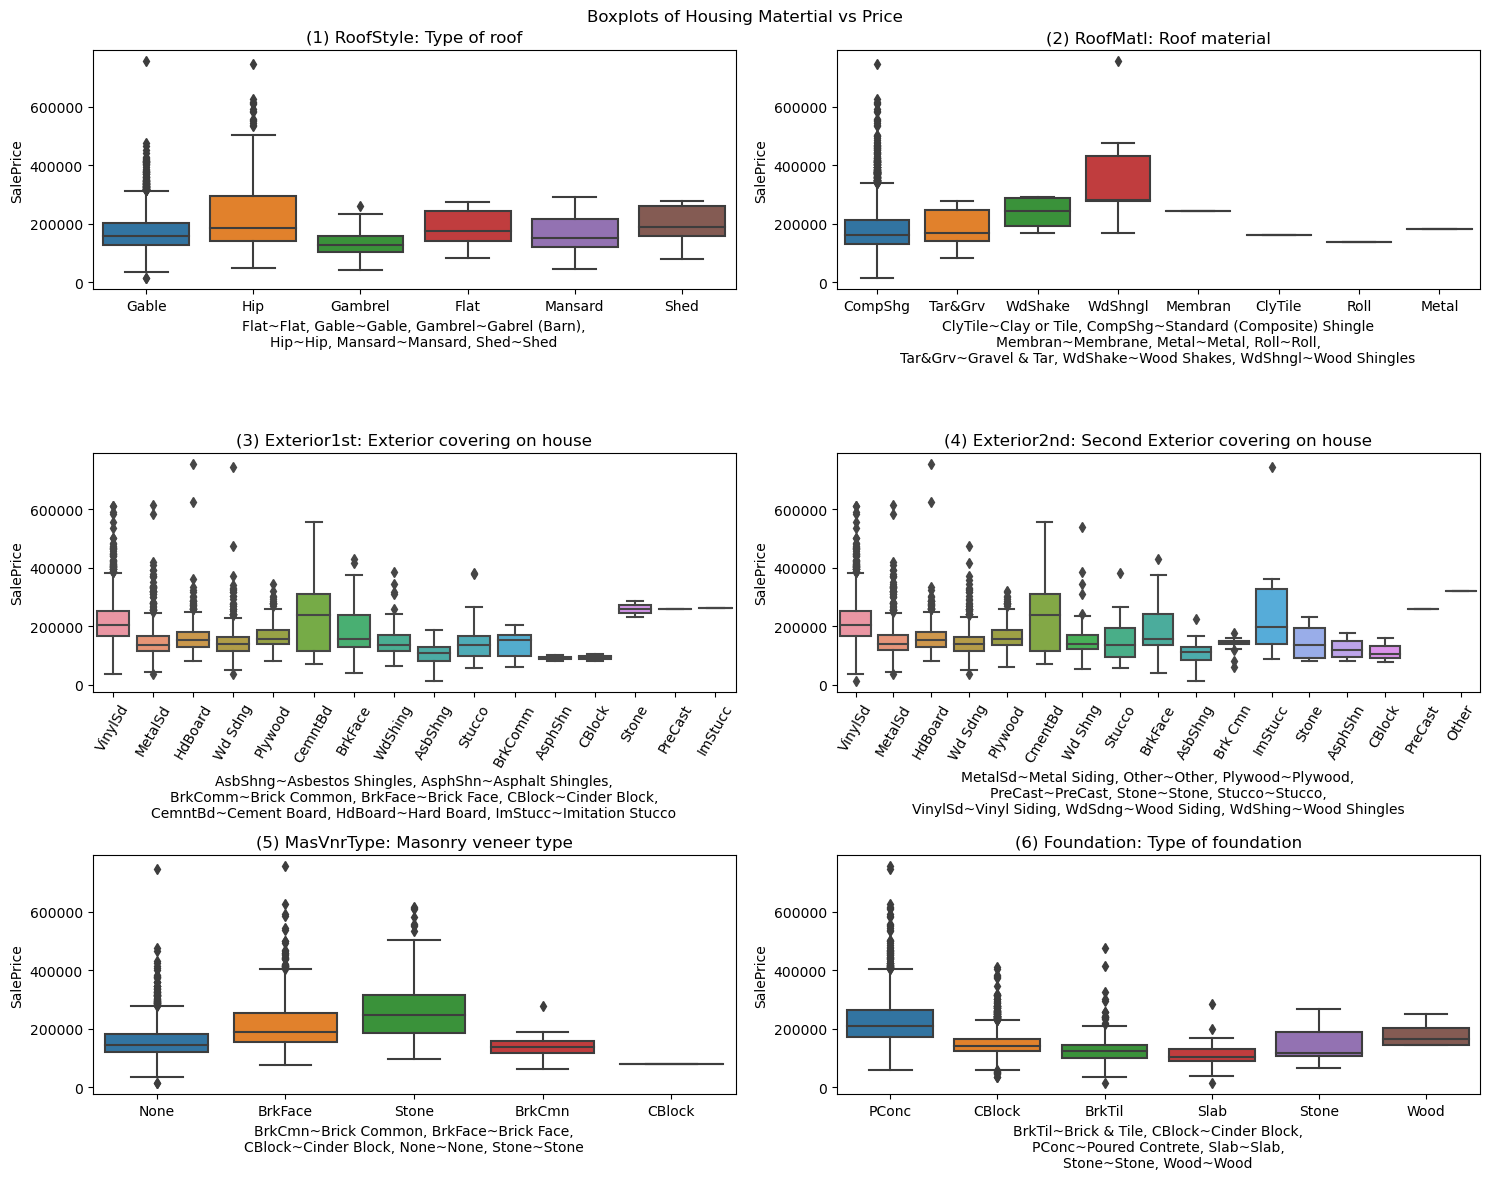

In [36]:
data_boxplot = pd.concat([data_material, data['SalePrice']], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

fig.suptitle('Boxplots of Housing Matertial vs Price')

for i, column in enumerate(data_material):
    ax = axes[i//2, i%2]  # 获取当前子图的轴对象
    sns.boxplot(x=column, y='SalePrice', data=data_boxplot,ax=ax,order=value_counts[i].index)
    
    ax.set_title(f"({i+1}) {title[i]}")
    ax.set_ylabel('SalePrice')
    
    ax.set_xlabel(str_[i])
    if i > 1 and i < 4:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    
    if i <= 1 and i >= 4:
        ax.text(0.98, 0.98, f'{value_counts[i]}', transform=ax.transAxes,\
                ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

In [ ]:
# Categorial vs categorial
 

In [89]:
col_lst = ["MSSubClass","OverallQual","OverallCond"]
data[col_lst] = data[col_lst].astype(object)

categorical_cols = data.select_dtypes(include='object').columns.tolist()
numeric_cols = data.select_dtypes(include='number').columns.tolist()

data_cat = data[categorical_cols]
data_num = data[numeric_cols]
print(len(categorical_cols))
print(len(numeric_cols))

46
37


In [91]:
from scipy import stats
response_var = 'SalePrice'  #or 'SalePrice' log
CATVAL, DF = 0,1  #C style enum type. See note below.
arg_list = []  #argument list for f oneway() function.
res_list = []  #result list with tuples: (f-score, p-value)

for cat in categorical_cols:
    #create cat feature value wise groups of the main dataframe.
    group_list = list(data.groupby(cat))  #get the groups into a list one dataframe per
    #cat value.
    #Structure of this array: Array of tuples - first element is cat value, second element is dataframe.
    #Note: Use the enum values above to traverse through group list.
    
    for grp in group_list:  #group gets tuples: (cat-val, df with selected cat-val)
        arg_list.append(grp[DF][response_var].values)
        #arg_list now has a list of response variable columns, one for each category value.
        
    #Apply the one-way Kruskal-Wallis (non-parametric) ANOVA.
    h_value, p_value = stats.kruskal(*arg_list) 
    res_list.append((cat,h_value,p_value))
    
fvalue_df = pd.DataFrame(res_list, columns = ['cat', 'h_value', 'p_value'])
#We have a dataframe with f/h scores and p-values; we need to pick the best n indicating strongest
#correlation.
fvalue_df.sort_values(['p_value','h_value'], ascending = [True,False], inplace = True)
fvalue_df.reset_index(drop = True, inplace = True) #resetting the index gives us an advantage.
#If two categories are related as shown by the chi square test, we can pick the one that has a 
#lower value as that will be more strongly correlated to the response variable.
#fvalue_df.iloc[:,:].to_excel('Kruskal-Wallis (non-parametric) ANOVA.xlsx', index=False)

In [92]:
from itertools import combinations
from scipy import stats
import math
data_cat = data[categorical_cols]
cat_pairs = combinations(data_cat, 2) #tuples with pairs of features.
chisq_df_rows = []  #Prepare to create a dataframe.
# for c in cat_pairs:
#     print(c)
N = data_cat.shape[0]  #number of observations or rows.
for cat1, cat2 in cat_pairs:
    cat_crosstab = pd.crosstab(data_cat[cat1], data_cat[cat2], normalize=False)
    chisq,p,dof,_ = stats.chi2_contingency(cat_crosstab) #_ is 'expected' crosstab table
    #for Cramer's V
    k = min(len(data_cat[cat1].unique()), len(data_cat[cat2].unique()))
    cramersV = math.sqrt(chisq/(N*(k-1)))
    chisq_df_rows.append((cat1, cat2, chisq, p, cramersV, k))
    
chisq_df = pd.DataFrame(chisq_df_rows, columns = ['Cat1','Cat2','chisq','p','Cramers V','dof'])
#create dataframe with the data.
chisq_df.sort_values(by='Cramers V', ascending=False, inplace=True)
chisq_table = chisq_df[chisq_df['Cramers V'] > 0.5]
chisq_table
#chisq_table.to_excel('chisq_table.xlsx', index=False)

Cat1          Cat2         chisq    p  Cramers V  dof
11      MSSubClass      BldgType   9296.404394  0.0   0.890623    5
12      MSSubClass    HouseStyle  14188.453915  0.0   0.831734    8
657    Exterior1st   Exterior2nd  24232.113768  0.0   0.742534   16
990     GarageType  GarageFinish   4134.265877  0.0   0.685812    4
1007    GarageQual    GarageCond   5774.219475  0.0   0.627809    6
545    OverallQual     ExterQual   3332.512503  0.0   0.615732    4
999   GarageFinish    GarageQual   3094.068829  0.0   0.593295    4
1000  GarageFinish    GarageCond   3050.720290  0.0   0.589124    4
746      ExterQual   KitchenQual   2611.599108  0.0   0.545078    4
52        MSZoning  Neighborhood   5200.279332  0.0   0.543881    7
805       BsmtQual  BsmtExposure   3290.227916  0.0   0.529845    5
845   BsmtExposure  BsmtFinType1   3237.474395  0.0   0.525581    5
806       BsmtQual  BsmtFinType1   4024.661485  0.0   0.524138    6
380   Neighborhood     ExterQual   2251.983661  0.0   0.506160    4

Text(0.5, 1.0, "Correlation of Categoricals using Cramer's V thrsh: 0.50")

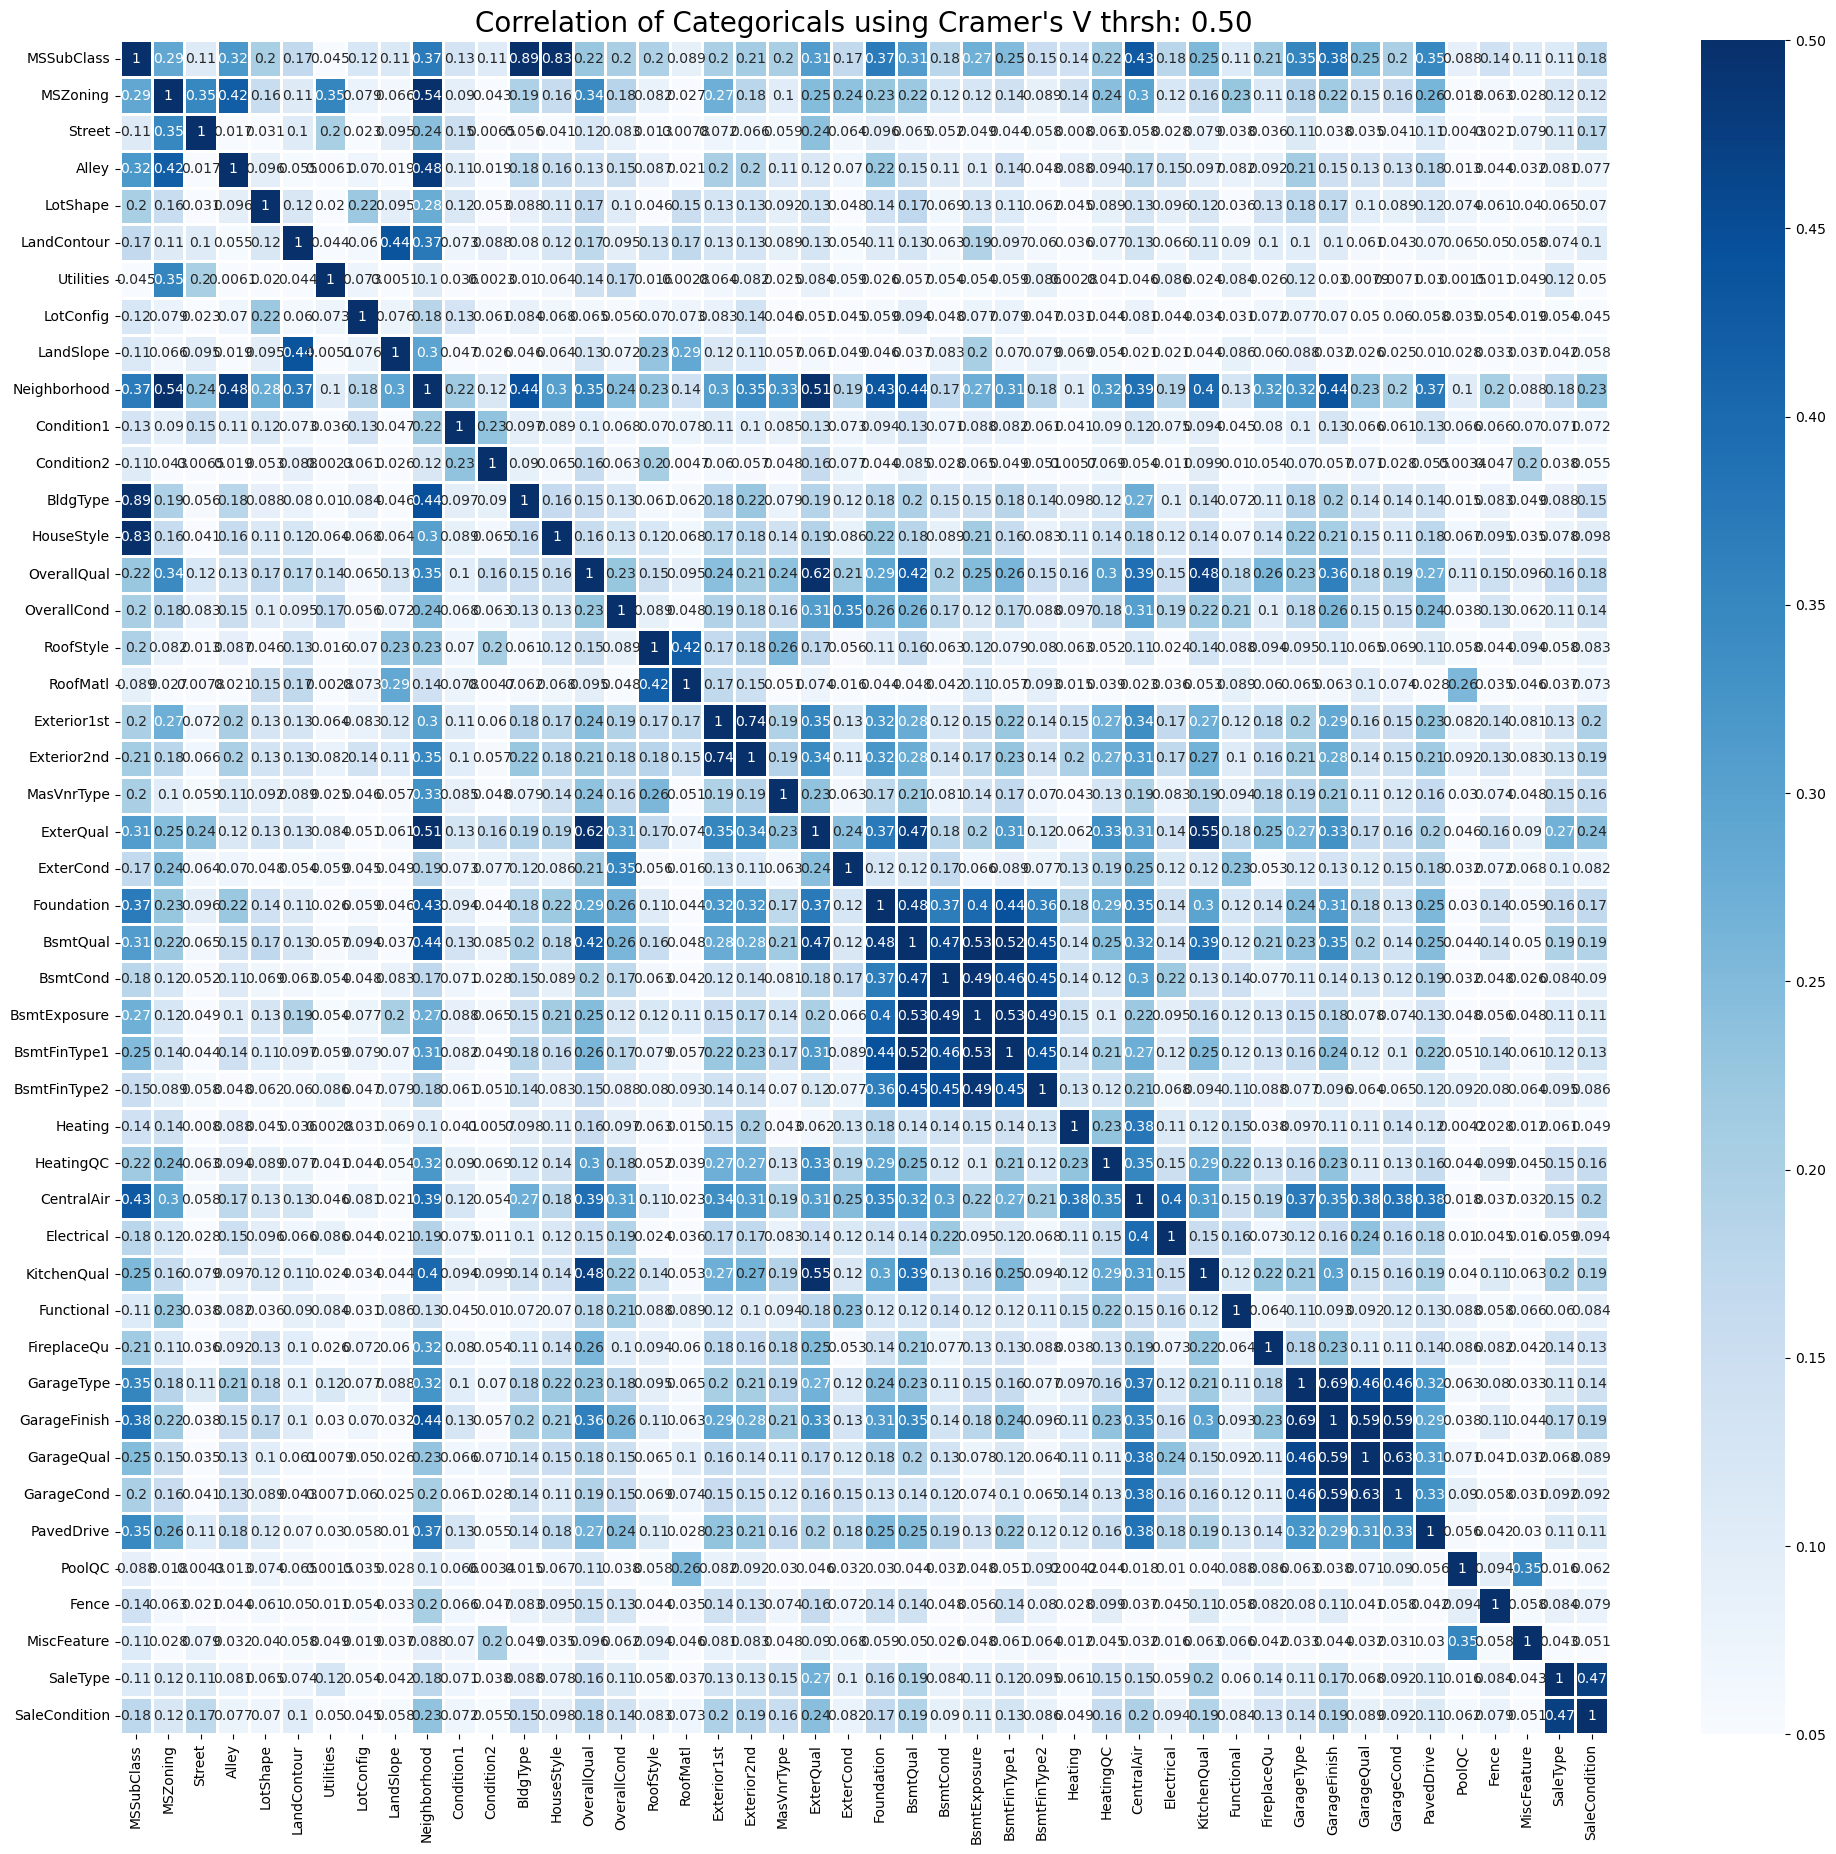

In [93]:
#Create a square dataframe with to hold Cramer's V values
cat_corr_df = pd.DataFrame(0, columns=categorical_cols, index=categorical_cols)

#extract the three vectors we want: 
# cat1, cat2 and 'Cramers V' -- zip them and then populate corr. matrix
cat_corr_tup = zip(chisq_df['Cat1'],chisq_df['Cat2'],chisq_df['Cramers V'])

for cat1, cat2, crv in cat_corr_tup:
    #Now that we have the coordinates and values, populate the cat_corr_df
    cat_corr_df.loc[cat1,cat2] = crv
    cat_corr_df.loc[cat2,cat1] = crv  #symmetry across diagonal.
    cat_corr_df.loc[cat1,cat1] = cat_corr_df.loc[cat2,cat2] = 1 # 1 along diagonals.
    
plt.figure(figsize=(24,22))
vmax = 0.50
vmin = 0.05
sns.heatmap(cat_corr_df, annot=True, cmap="Blues", linewidths=1, linecolor='white', fmt="0.2g",vmax=vmax,vmin=vmin)
#choosing vmin, vmax helps us map the operative part of the annotation range to the entire color-bar range.
#we choose vmin=0.05 and vmax=0.50 based on the guidance value of Cramer's V for the minimum dof of 4.
plt.title("Correlation of Categoricals using Cramer's V thrsh: %.2f"%vmax, fontdict={'fontsize':20})

In [94]:
categorical_del_cols= ['MSSubClass','Exterior2nd','GarageFinish',\
    'ExterQual','Neighborhood','BsmtExposure','BsmtFinType1','GarageCond']
for i in categorical_del_cols:
    categorical_cols.remove(i)
    
data_cat = data[categorical_cols]
cat_pairs = combinations(data_cat, 2) #tuples with pairs of features.
chisq_df_rows = []  #Prepare to create a dataframe.
# for c in cat_pairs:
#     print(c)
N = data_cat.shape[0]  #number of observations or rows.
for cat1, cat2 in cat_pairs:
    cat_crosstab = pd.crosstab(data_cat[cat1], data_cat[cat2], normalize=False)
    chisq,p,dof,_ = stats.chi2_contingency(cat_crosstab) #_ is 'expected' crosstab table
    #for Cramer's V
    k = min(len(data_cat[cat1].unique()), len(data_cat[cat2].unique()))
    cramersV = math.sqrt(chisq/(N*(k-1)))
    chisq_df_rows.append((cat1, cat2, chisq, p, cramersV, k))
    
chisq_df = pd.DataFrame(chisq_df_rows, columns = ['Cat1','Cat2','chisq','p','Cramers V','dof'])    
cat_pairs = combinations(data_cat, 2) #tuples with pairs of features.
chisq_df_rows = []  #Prepare to create a dataframe.
# for c in cat_pairs:
#     print(c)
N = data_cat.shape[0]  #number of observations or rows.
for cat1, cat2 in cat_pairs:
    cat_crosstab = pd.crosstab(data_cat[cat1], data_cat[cat2], normalize=False)
    chisq,p,dof,_ = stats.chi2_contingency(cat_crosstab) #_ is 'expected' crosstab table
    #for Cramer's V
    k = min(len(data_cat[cat1].unique()), len(data_cat[cat2].unique()))
    cramersV = math.sqrt(chisq/(N*(k-1)))
    chisq_df_rows.append((cat1, cat2, chisq, p, cramersV, k))
    
chisq_df = pd.DataFrame(chisq_df_rows, columns = ['cat1','cat2','chisq','p','Cramers V','dof'])
#create dataframe with the data.
# chisq_df.sort_values(by='Cramers V', ascending=False, inplace=True)
# chisq_table = chisq_df[chisq_df['Cramers V'] > 0.5]
# chisq_table

In [98]:
chisq_df

cat1           cat2        chisq              p  Cramers V  dof
0       MSZoning         Street   359.555306   1.370346e-74   0.350307    2
1       MSZoning          Alley  1031.107548  3.839313e-213   0.419472    3
2       MSZoning       LotShape   214.971118   9.957305e-36   0.156385    4
3       MSZoning    LandContour   100.581457   1.733011e-13   0.106971    4
4       MSZoning      Utilities   731.932767  6.409168e-149   0.353416    3
..           ...            ...          ...            ...        ...  ...
698        Fence       SaleType    82.747143   1.526915e-05   0.084026    5
699        Fence  SaleCondition    72.318783   7.583665e-08   0.078553    5
700  MiscFeature       SaleType    26.801825   9.857301e-01   0.042772    6
701  MiscFeature  SaleCondition    38.680984   3.964176e-02   0.051384    6
702     SaleType  SaleCondition  3272.556191   0.000000e+00   0.472634    6

[703 rows x 6 columns]

Text(0.5, 1.0, 'Categorical variables de-correlated')

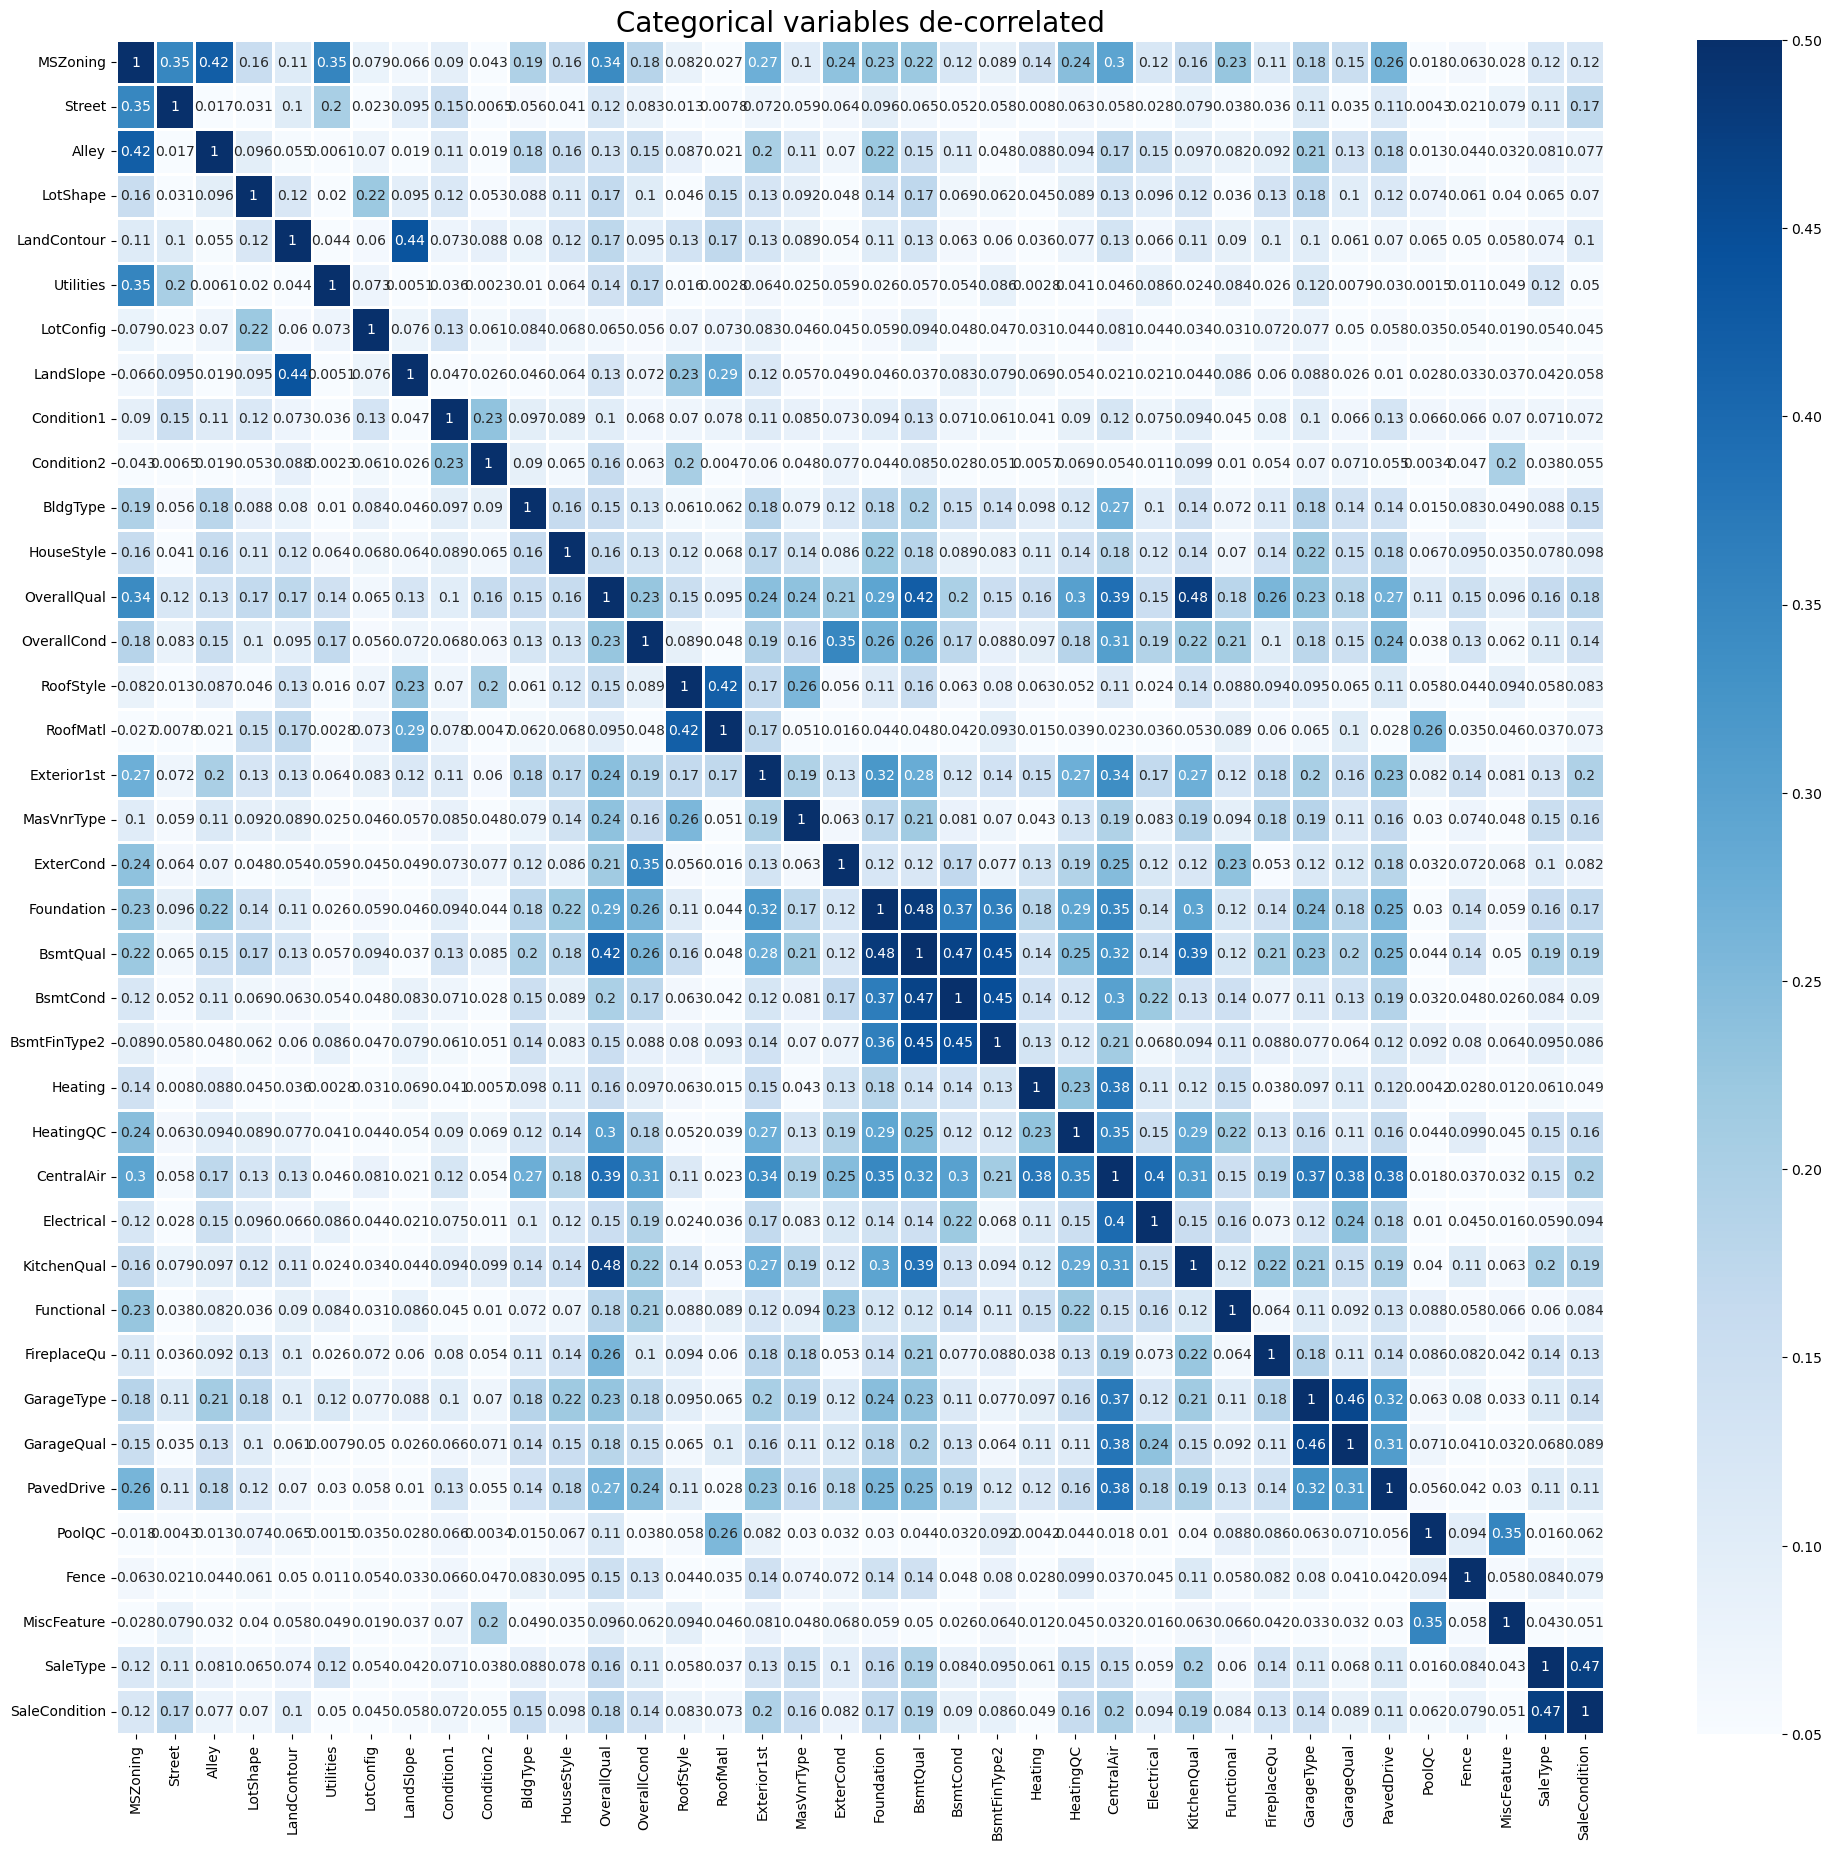

In [100]:
cat_corr_df = pd.DataFrame(0, columns=categorical_cols, index=categorical_cols)

#extract the three vectors we want: 
# cat1, cat2 and 'Cramers V' -- zip them and then populate corr. matrix
cat_corr_tup = zip(chisq_df['cat1'],chisq_df['cat2'],chisq_df['Cramers V'])

for cat1, cat2, crv in cat_corr_tup:
    #Now that we have the coordinates and values, populate the cat_corr_df
    cat_corr_df.loc[cat1,cat2] = crv
    cat_corr_df.loc[cat2,cat1] = crv  #symmetry across diagonal.
    cat_corr_df.loc[cat1,cat1] = cat_corr_df.loc[cat2,cat2] = 1 # 1 along diagonals.
    
plt.figure(figsize=(24,22))
vmax = 0.50
vmin = 0.05
sns.heatmap(cat_corr_df, annot=True, cmap="Blues", linewidths=1, linecolor='white', fmt="0.2g",vmax=vmax,vmin=vmin)
#choosing vmin, vmax helps us map the operative part of the annotation range to the entire color-bar range.
#we choose vmin=0.05 and vmax=0.50 based on the guidance value of Cramer's V for the minimum dof of 4.
plt.title("Categorical variables de-correlated", fontdict={'fontsize':20})

# Numerical Vs Numerical Variable

<Axes: title={'center': 'Cross-correlations including response variable'}>

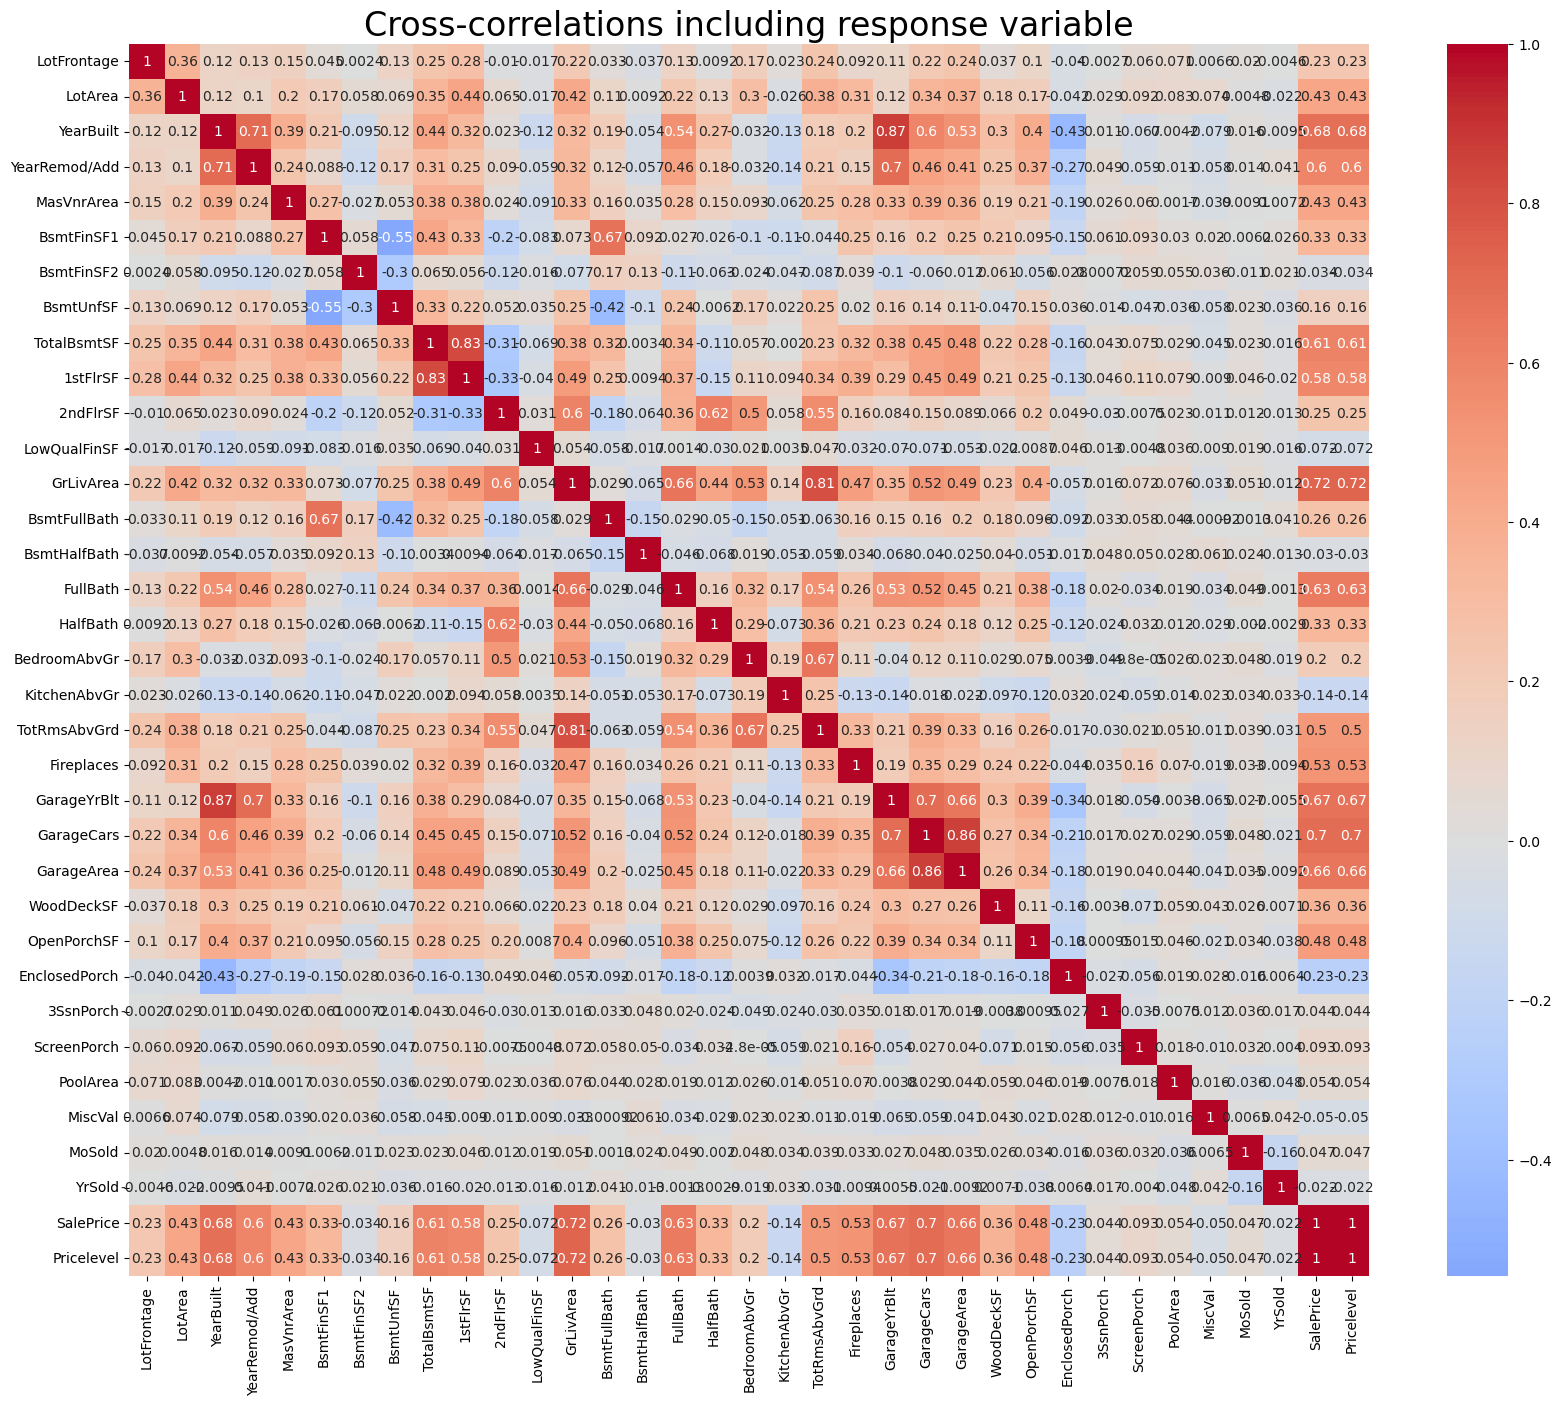

In [77]:
data_num = data[numeric_cols].drop(['PID','Order'],axis=1)
fig, ax = plt.subplots(1,1, figsize=(20,16))
full_corr_df = data_num.corr('spearman')
ax.set_title("Cross-correlations including response variable", fontsize=24)
sns.heatmap(full_corr_df, annot=True, cmap="coolwarm",center=0, ax=ax)

<Axes: title={'center': 'Correlations showing Multi-collinearity'}>

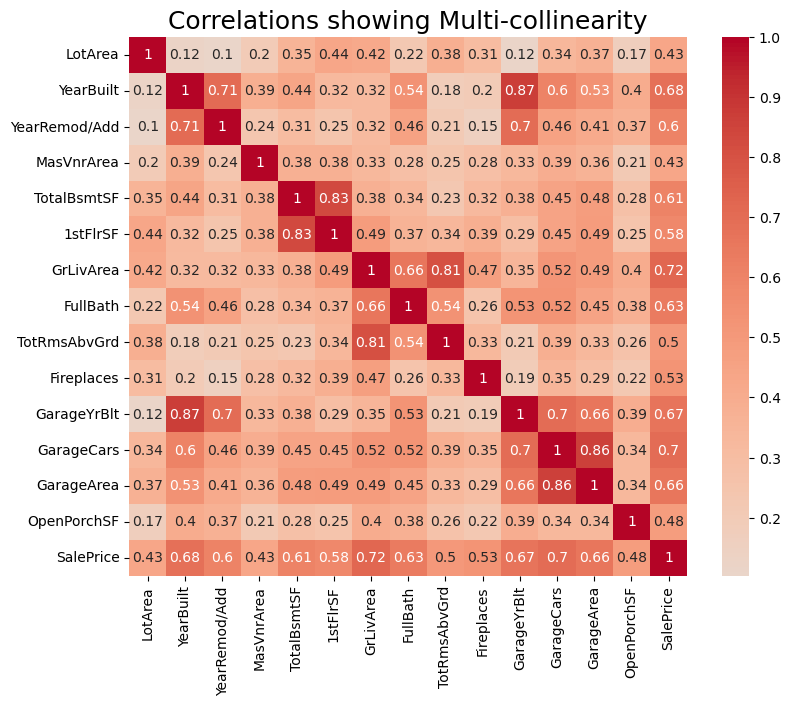

In [85]:
corr_thrsh = 0.4  

corr_features = list(full_corr_df[abs(full_corr_df['SalePrice'])>corr_thrsh].index)
#Features noticably correlated to 'SalePrice'
corr_features.remove('SalePrice')
corr_features.remove('Pricelevel')
corr_features 

fig, ax = plt.subplots(1,1, figsize=(9,7))
multi_coll_df = data_num[corr_features+['SalePrice']].corr('spearman')
ax.set_title("Correlations showing Multi-collinearity", fontsize=18)
sns.heatmap(multi_coll_df, annot=True, cmap="coolwarm", center=0, ax=ax)